In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

from matplotlib import animation

%matplotlib inline

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

In [16]:
np.random.seed(12)

In [251]:
def function(x):
    return abs(math.sin(x))**(1/2)

In [252]:
X = np.linspace(-4,4,300)
y = np.array(list(map(function,X)))

In [253]:
x_train = np.array([X[i] for i in range(0,len(X),2)])
y_train = np.array([y[i] for i in range(0,len(y),2)])

x_test = np.array([X[i] for i in range(0,len(X),5)])
y_test = np.array([y[i] for i in range(0,len(y),5)])

In [254]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((150,), (150,), (60,), (60,))

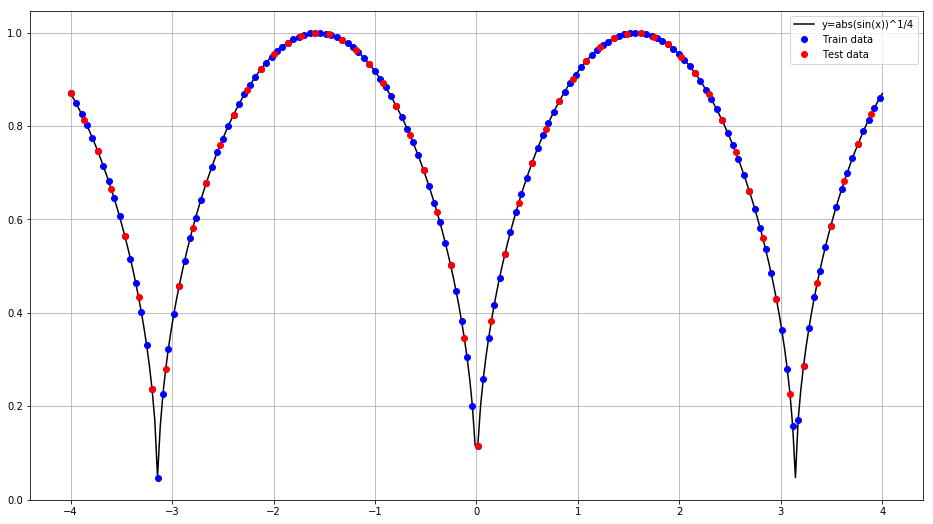

In [256]:
plt.plot(X,y, label='y=abs(sin(x))^1/4', color='#000000')
plt.plot(x_train,y_train,'o',color='#0000FF',label='Train data')
plt.plot(x_test,y_test,'o',color='#FF0000',label='Test data', linewidth=6)
plt.grid()
plt.legend()
plt.show()

In [258]:
neurons_type = 'selu'
neurons_number = list(range(1,131,10))
epochs_number = 50

In [259]:
losses = []

In [260]:
for number in neurons_number:
    
    model = Sequential()
    
    model.add(Dense(number, input_dim=1, activation=neurons_type, kernel_initializer='he_normal'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(loss='mse', optimizer='adam')
    
    loss = {'loss':[], 'val_loss':[]}
    
    for epoch in range(epochs_number): 
        
        print('Model with {0} neurons. Epoch: {1}'.format(number, epoch*10))
        
        hist = model.fit(x_train, y_train, batch_size=10, epochs=10, verbose=2, validation_data=(x_test,y_test))
        
        loss['loss'].extend(hist.history['loss'])
        loss['val_loss'].extend(hist.history['val_loss'])
        
    losses.append(loss)
    model.save('model {0}.h5'.format(number))    

Model with 1 neurons. Epoch: 0
Train on 150 samples, validate on 60 samples
Epoch 1/10
2s - loss: 6.3446 - val_loss: 6.3136
Epoch 2/10
0s - loss: 6.0014 - val_loss: 5.9642
Epoch 3/10
0s - loss: 5.6707 - val_loss: 5.6330
Epoch 4/10
0s - loss: 5.3520 - val_loss: 5.3258
Epoch 5/10
0s - loss: 5.0672 - val_loss: 5.0345
Epoch 6/10
0s - loss: 4.7942 - val_loss: 4.7626
Epoch 7/10
0s - loss: 4.5278 - val_loss: 4.5214
Epoch 8/10
0s - loss: 4.2943 - val_loss: 4.2830
Epoch 9/10
0s - loss: 4.0698 - val_loss: 4.0565
Epoch 10/10
0s - loss: 3.8603 - val_loss: 3.8418
Model with 1 neurons. Epoch: 10
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 3.6558 - val_loss: 3.6486
Epoch 2/10
0s - loss: 3.4760 - val_loss: 3.4574
Epoch 3/10
0s - loss: 3.2969 - val_loss: 3.2822
Epoch 4/10
0s - loss: 3.1278 - val_loss: 3.1228
Epoch 5/10
0s - loss: 2.9766 - val_loss: 2.9661
Epoch 6/10
0s - loss: 2.8342 - val_loss: 2.8143
Epoch 7/10
0s - loss: 2.6895 - val_loss: 2.6810
Epoch 8/10
0s - loss: 2.5611 -

0s - loss: 0.0663 - val_loss: 0.0658
Epoch 9/10
0s - loss: 0.0658 - val_loss: 0.0653
Epoch 10/10
0s - loss: 0.0653 - val_loss: 0.0648
Model with 1 neurons. Epoch: 150
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0649 - val_loss: 0.0643
Epoch 2/10
0s - loss: 0.0644 - val_loss: 0.0639
Epoch 3/10
0s - loss: 0.0641 - val_loss: 0.0635
Epoch 4/10
0s - loss: 0.0636 - val_loss: 0.0631
Epoch 5/10
0s - loss: 0.0632 - val_loss: 0.0628
Epoch 6/10
0s - loss: 0.0629 - val_loss: 0.0624
Epoch 7/10
0s - loss: 0.0626 - val_loss: 0.0620
Epoch 8/10
0s - loss: 0.0623 - val_loss: 0.0617
Epoch 9/10
0s - loss: 0.0620 - val_loss: 0.0614
Epoch 10/10
0s - loss: 0.0617 - val_loss: 0.0611
Model with 1 neurons. Epoch: 160
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0615 - val_loss: 0.0608
Epoch 2/10
0s - loss: 0.0612 - val_loss: 0.0606
Epoch 3/10
0s - loss: 0.0609 - val_loss: 0.0603
Epoch 4/10
0s - loss: 0.0607 - val_loss: 0.0601
Epoch 5/10
0s - loss: 0.0605 - val_lo

0s - loss: 0.0564 - val_loss: 0.0554
Epoch 5/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 6/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 7/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 8/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 9/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 10/10
0s - loss: 0.0564 - val_loss: 0.0554
Model with 1 neurons. Epoch: 300
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0565 - val_loss: 0.0554
Epoch 2/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 3/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 4/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 5/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 6/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 7/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 8/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 9/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 10/10
0s - loss: 0.0564 - val_loss: 0.0554
Model with 1 neurons. Epoch: 310
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0564 - val_lo

0s - loss: 0.0565 - val_loss: 0.0554
Epoch 2/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 3/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 4/10
0s - loss: 0.0565 - val_loss: 0.0555
Epoch 5/10
0s - loss: 0.0566 - val_loss: 0.0554
Epoch 6/10
0s - loss: 0.0564 - val_loss: 0.0555
Epoch 7/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 8/10
0s - loss: 0.0565 - val_loss: 0.0554
Epoch 9/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 10/10
0s - loss: 0.0564 - val_loss: 0.0554
Model with 1 neurons. Epoch: 450
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 2/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 3/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 4/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 5/10
0s - loss: 0.0565 - val_loss: 0.0554
Epoch 6/10
0s - loss: 0.0565 - val_loss: 0.0554
Epoch 7/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 8/10
0s - loss: 0.0564 - val_loss: 0.0554
Epoch 9/10
0s - loss: 0.0566 - val_loss: 0.0555
Epoch 10/10
0s - los

0s - loss: 0.0520 - val_loss: 0.0509
Epoch 10/10
0s - loss: 0.0524 - val_loss: 0.0507
Model with 11 neurons. Epoch: 90
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0521 - val_loss: 0.0507
Epoch 2/10
0s - loss: 0.0517 - val_loss: 0.0504
Epoch 3/10
0s - loss: 0.0515 - val_loss: 0.0501
Epoch 4/10
0s - loss: 0.0518 - val_loss: 0.0503
Epoch 5/10
0s - loss: 0.0513 - val_loss: 0.0498
Epoch 6/10
0s - loss: 0.0509 - val_loss: 0.0495
Epoch 7/10
0s - loss: 0.0504 - val_loss: 0.0499
Epoch 8/10
0s - loss: 0.0508 - val_loss: 0.0491
Epoch 9/10
0s - loss: 0.0506 - val_loss: 0.0492
Epoch 10/10
0s - loss: 0.0504 - val_loss: 0.0488
Model with 11 neurons. Epoch: 100
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0507 - val_loss: 0.0487
Epoch 2/10
0s - loss: 0.0502 - val_loss: 0.0484
Epoch 3/10
0s - loss: 0.0505 - val_loss: 0.0485
Epoch 4/10
0s - loss: 0.0494 - val_loss: 0.0483
Epoch 5/10
0s - loss: 0.0489 - val_loss: 0.0482
Epoch 6/10
0s - loss: 0.0494 - val_l

0s - loss: 0.0342 - val_loss: 0.0321
Epoch 6/10
0s - loss: 0.0344 - val_loss: 0.0320
Epoch 7/10
0s - loss: 0.0336 - val_loss: 0.0319
Epoch 8/10
0s - loss: 0.0335 - val_loss: 0.0320
Epoch 9/10
0s - loss: 0.0344 - val_loss: 0.0320
Epoch 10/10
0s - loss: 0.0346 - val_loss: 0.0318
Model with 11 neurons. Epoch: 240
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0345 - val_loss: 0.0318
Epoch 2/10
0s - loss: 0.0337 - val_loss: 0.0321
Epoch 3/10
0s - loss: 0.0331 - val_loss: 0.0316
Epoch 4/10
0s - loss: 0.0344 - val_loss: 0.0318
Epoch 5/10
0s - loss: 0.0334 - val_loss: 0.0315
Epoch 6/10
0s - loss: 0.0338 - val_loss: 0.0315
Epoch 7/10
0s - loss: 0.0332 - val_loss: 0.0316
Epoch 8/10
0s - loss: 0.0335 - val_loss: 0.0314
Epoch 9/10
0s - loss: 0.0331 - val_loss: 0.0316
Epoch 10/10
0s - loss: 0.0343 - val_loss: 0.0315
Model with 11 neurons. Epoch: 250
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0338 - val_loss: 0.0315
Epoch 2/10
0s - loss: 0.0349 - val_

0s - loss: 0.0303 - val_loss: 0.0278
Epoch 2/10
0s - loss: 0.0304 - val_loss: 0.0279
Epoch 3/10
0s - loss: 0.0314 - val_loss: 0.0280
Epoch 4/10
0s - loss: 0.0293 - val_loss: 0.0280
Epoch 5/10
0s - loss: 0.0298 - val_loss: 0.0279
Epoch 6/10
0s - loss: 0.0295 - val_loss: 0.0278
Epoch 7/10
0s - loss: 0.0300 - val_loss: 0.0284
Epoch 8/10
0s - loss: 0.0299 - val_loss: 0.0278
Epoch 9/10
0s - loss: 0.0291 - val_loss: 0.0287
Epoch 10/10
0s - loss: 0.0315 - val_loss: 0.0280
Model with 11 neurons. Epoch: 390
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0305 - val_loss: 0.0283
Epoch 2/10
0s - loss: 0.0297 - val_loss: 0.0278
Epoch 3/10
0s - loss: 0.0299 - val_loss: 0.0282
Epoch 4/10
0s - loss: 0.0304 - val_loss: 0.0278
Epoch 5/10
0s - loss: 0.0301 - val_loss: 0.0277
Epoch 6/10
0s - loss: 0.0299 - val_loss: 0.0278
Epoch 7/10
0s - loss: 0.0286 - val_loss: 0.0291
Epoch 8/10
0s - loss: 0.0298 - val_loss: 0.0276
Epoch 9/10
0s - loss: 0.0314 - val_loss: 0.0277
Epoch 10/10
0s - lo

0s - loss: 0.0659 - val_loss: 0.0655
Epoch 10/10
0s - loss: 0.0672 - val_loss: 0.0651
Model with 21 neurons. Epoch: 30
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0668 - val_loss: 0.0647
Epoch 2/10
0s - loss: 0.0645 - val_loss: 0.0646
Epoch 3/10
0s - loss: 0.0663 - val_loss: 0.0641
Epoch 4/10
0s - loss: 0.0683 - val_loss: 0.0632
Epoch 5/10
0s - loss: 0.0680 - val_loss: 0.0631
Epoch 6/10
0s - loss: 0.0628 - val_loss: 0.0623
Epoch 7/10
0s - loss: 0.0642 - val_loss: 0.0620
Epoch 8/10
0s - loss: 0.0644 - val_loss: 0.0615
Epoch 9/10
0s - loss: 0.0649 - val_loss: 0.0609
Epoch 10/10
0s - loss: 0.0625 - val_loss: 0.0604
Model with 21 neurons. Epoch: 40
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0604 - val_loss: 0.0600
Epoch 2/10
0s - loss: 0.0602 - val_loss: 0.0597
Epoch 3/10
0s - loss: 0.0607 - val_loss: 0.0592
Epoch 4/10
0s - loss: 0.0597 - val_loss: 0.0587
Epoch 5/10
0s - loss: 0.0592 - val_loss: 0.0583
Epoch 6/10
0s - loss: 0.0592 - val_lo

0s - loss: 0.0355 - val_loss: 0.0324
Epoch 6/10
0s - loss: 0.0359 - val_loss: 0.0325
Epoch 7/10
0s - loss: 0.0341 - val_loss: 0.0323
Epoch 8/10
0s - loss: 0.0344 - val_loss: 0.0322
Epoch 9/10
0s - loss: 0.0354 - val_loss: 0.0335
Epoch 10/10
0s - loss: 0.0370 - val_loss: 0.0323
Model with 21 neurons. Epoch: 180
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0370 - val_loss: 0.0328
Epoch 2/10
0s - loss: 0.0352 - val_loss: 0.0345
Epoch 3/10
0s - loss: 0.0360 - val_loss: 0.0339
Epoch 4/10
0s - loss: 0.0387 - val_loss: 0.0321
Epoch 5/10
0s - loss: 0.0329 - val_loss: 0.0317
Epoch 6/10
0s - loss: 0.0345 - val_loss: 0.0318
Epoch 7/10
0s - loss: 0.0352 - val_loss: 0.0325
Epoch 8/10
0s - loss: 0.0350 - val_loss: 0.0329
Epoch 9/10
0s - loss: 0.0338 - val_loss: 0.0315
Epoch 10/10
0s - loss: 0.0332 - val_loss: 0.0315
Model with 21 neurons. Epoch: 190
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0356 - val_loss: 0.0317
Epoch 2/10
0s - loss: 0.0329 - val_

0s - loss: 0.0292 - val_loss: 0.0274
Epoch 2/10
0s - loss: 0.0295 - val_loss: 0.0291
Epoch 3/10
0s - loss: 0.0322 - val_loss: 0.0274
Epoch 4/10
0s - loss: 0.0292 - val_loss: 0.0292
Epoch 5/10
0s - loss: 0.0321 - val_loss: 0.0277
Epoch 6/10
0s - loss: 0.0295 - val_loss: 0.0273
Epoch 7/10
0s - loss: 0.0296 - val_loss: 0.0296
Epoch 8/10
0s - loss: 0.0328 - val_loss: 0.0273
Epoch 9/10
0s - loss: 0.0307 - val_loss: 0.0280
Epoch 10/10
0s - loss: 0.0301 - val_loss: 0.0305
Model with 21 neurons. Epoch: 330
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0303 - val_loss: 0.0276
Epoch 2/10
0s - loss: 0.0311 - val_loss: 0.0271
Epoch 3/10
0s - loss: 0.0309 - val_loss: 0.0274
Epoch 4/10
0s - loss: 0.0294 - val_loss: 0.0272
Epoch 5/10
0s - loss: 0.0313 - val_loss: 0.0279
Epoch 6/10
0s - loss: 0.0298 - val_loss: 0.0272
Epoch 7/10
0s - loss: 0.0315 - val_loss: 0.0285
Epoch 8/10
0s - loss: 0.0289 - val_loss: 0.0274
Epoch 9/10
0s - loss: 0.0297 - val_loss: 0.0293
Epoch 10/10
0s - lo

0s - loss: 0.0273 - val_loss: 0.0254
Epoch 10/10
0s - loss: 0.0270 - val_loss: 0.0253
Model with 21 neurons. Epoch: 470
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0279 - val_loss: 0.0266
Epoch 2/10
0s - loss: 0.0281 - val_loss: 0.0256
Epoch 3/10
0s - loss: 0.0273 - val_loss: 0.0251
Epoch 4/10
0s - loss: 0.0277 - val_loss: 0.0252
Epoch 5/10
0s - loss: 0.0280 - val_loss: 0.0255
Epoch 6/10
0s - loss: 0.0290 - val_loss: 0.0253
Epoch 7/10
0s - loss: 0.0311 - val_loss: 0.0253
Epoch 8/10
0s - loss: 0.0275 - val_loss: 0.0257
Epoch 9/10
0s - loss: 0.0270 - val_loss: 0.0266
Epoch 10/10
0s - loss: 0.0291 - val_loss: 0.0251
Model with 21 neurons. Epoch: 480
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0278 - val_loss: 0.0262
Epoch 2/10
0s - loss: 0.0282 - val_loss: 0.0255
Epoch 3/10
0s - loss: 0.0270 - val_loss: 0.0252
Epoch 4/10
0s - loss: 0.0272 - val_loss: 0.0251
Epoch 5/10
0s - loss: 0.0281 - val_loss: 0.0256
Epoch 6/10
0s - loss: 0.0272 - val_

0s - loss: 0.0366 - val_loss: 0.0336
Epoch 6/10
0s - loss: 0.0353 - val_loss: 0.0342
Epoch 7/10
0s - loss: 0.0355 - val_loss: 0.0335
Epoch 8/10
0s - loss: 0.0354 - val_loss: 0.0338
Epoch 9/10
0s - loss: 0.0360 - val_loss: 0.0345
Epoch 10/10
0s - loss: 0.0356 - val_loss: 0.0334
Model with 31 neurons. Epoch: 120
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0358 - val_loss: 0.0346
Epoch 2/10
0s - loss: 0.0365 - val_loss: 0.0338
Epoch 3/10
0s - loss: 0.0371 - val_loss: 0.0333
Epoch 4/10
0s - loss: 0.0347 - val_loss: 0.0337
Epoch 5/10
0s - loss: 0.0354 - val_loss: 0.0334
Epoch 6/10
0s - loss: 0.0362 - val_loss: 0.0333
Epoch 7/10
0s - loss: 0.0351 - val_loss: 0.0331
Epoch 8/10
0s - loss: 0.0362 - val_loss: 0.0338
Epoch 9/10
0s - loss: 0.0366 - val_loss: 0.0329
Epoch 10/10
0s - loss: 0.0384 - val_loss: 0.0358
Model with 31 neurons. Epoch: 130
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0411 - val_loss: 0.0330
Epoch 2/10
0s - loss: 0.0355 - val_

0s - loss: 0.0316 - val_loss: 0.0307
Epoch 2/10
0s - loss: 0.0330 - val_loss: 0.0296
Epoch 3/10
0s - loss: 0.0332 - val_loss: 0.0298
Epoch 4/10
0s - loss: 0.0323 - val_loss: 0.0308
Epoch 5/10
0s - loss: 0.0323 - val_loss: 0.0315
Epoch 6/10
0s - loss: 0.0354 - val_loss: 0.0314
Epoch 7/10
0s - loss: 0.0311 - val_loss: 0.0320
Epoch 8/10
0s - loss: 0.0336 - val_loss: 0.0294
Epoch 9/10
0s - loss: 0.0340 - val_loss: 0.0299
Epoch 10/10
0s - loss: 0.0338 - val_loss: 0.0295
Model with 31 neurons. Epoch: 270
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0326 - val_loss: 0.0301
Epoch 2/10
0s - loss: 0.0384 - val_loss: 0.0296
Epoch 3/10
0s - loss: 0.0352 - val_loss: 0.0309
Epoch 4/10
0s - loss: 0.0327 - val_loss: 0.0301
Epoch 5/10
0s - loss: 0.0319 - val_loss: 0.0296
Epoch 6/10
0s - loss: 0.0332 - val_loss: 0.0297
Epoch 7/10
0s - loss: 0.0340 - val_loss: 0.0296
Epoch 8/10
0s - loss: 0.0327 - val_loss: 0.0309
Epoch 9/10
0s - loss: 0.0343 - val_loss: 0.0345
Epoch 10/10
0s - lo

0s - loss: 0.0299 - val_loss: 0.0272
Epoch 10/10
0s - loss: 0.0300 - val_loss: 0.0274
Model with 31 neurons. Epoch: 410
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0304 - val_loss: 0.0279
Epoch 2/10
0s - loss: 0.0288 - val_loss: 0.0278
Epoch 3/10
0s - loss: 0.0291 - val_loss: 0.0276
Epoch 4/10
0s - loss: 0.0297 - val_loss: 0.0273
Epoch 5/10
0s - loss: 0.0307 - val_loss: 0.0281
Epoch 6/10
0s - loss: 0.0312 - val_loss: 0.0315
Epoch 7/10
0s - loss: 0.0309 - val_loss: 0.0270
Epoch 8/10
0s - loss: 0.0296 - val_loss: 0.0271
Epoch 9/10
0s - loss: 0.0301 - val_loss: 0.0268
Epoch 10/10
0s - loss: 0.0307 - val_loss: 0.0277
Model with 31 neurons. Epoch: 420
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0354 - val_loss: 0.0297
Epoch 2/10
0s - loss: 0.0316 - val_loss: 0.0270
Epoch 3/10
0s - loss: 0.0293 - val_loss: 0.0284
Epoch 4/10
0s - loss: 0.0297 - val_loss: 0.0283
Epoch 5/10
0s - loss: 0.0309 - val_loss: 0.0271
Epoch 6/10
0s - loss: 0.0315 - val_

0s - loss: 0.0714 - val_loss: 0.0707
Epoch 6/10
0s - loss: 0.0712 - val_loss: 0.0705
Epoch 7/10
0s - loss: 0.0711 - val_loss: 0.0700
Epoch 8/10
0s - loss: 0.0701 - val_loss: 0.0695
Epoch 9/10
0s - loss: 0.0702 - val_loss: 0.0691
Epoch 10/10
0s - loss: 0.0689 - val_loss: 0.0688
Model with 41 neurons. Epoch: 60
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0691 - val_loss: 0.0682
Epoch 2/10
0s - loss: 0.0686 - val_loss: 0.0679
Epoch 3/10
0s - loss: 0.0688 - val_loss: 0.0674
Epoch 4/10
0s - loss: 0.0677 - val_loss: 0.0670
Epoch 5/10
0s - loss: 0.0686 - val_loss: 0.0666
Epoch 6/10
0s - loss: 0.0672 - val_loss: 0.0666
Epoch 7/10
0s - loss: 0.0672 - val_loss: 0.0658
Epoch 8/10
0s - loss: 0.0662 - val_loss: 0.0653
Epoch 9/10
0s - loss: 0.0662 - val_loss: 0.0649
Epoch 10/10
0s - loss: 0.0654 - val_loss: 0.0648
Model with 41 neurons. Epoch: 70
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0651 - val_loss: 0.0641
Epoch 2/10
0s - loss: 0.0647 - val_lo

0s - loss: 0.0380 - val_loss: 0.0344
Epoch 2/10
0s - loss: 0.0350 - val_loss: 0.0310
Epoch 3/10
0s - loss: 0.0336 - val_loss: 0.0307
Epoch 4/10
0s - loss: 0.0328 - val_loss: 0.0313
Epoch 5/10
0s - loss: 0.0363 - val_loss: 0.0374
Epoch 6/10
0s - loss: 0.0359 - val_loss: 0.0354
Epoch 7/10
0s - loss: 0.0360 - val_loss: 0.0328
Epoch 8/10
0s - loss: 0.0327 - val_loss: 0.0307
Epoch 9/10
0s - loss: 0.0330 - val_loss: 0.0310
Epoch 10/10
0s - loss: 0.0329 - val_loss: 0.0306
Model with 41 neurons. Epoch: 210
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0352 - val_loss: 0.0308
Epoch 2/10
0s - loss: 0.0336 - val_loss: 0.0315
Epoch 3/10
0s - loss: 0.0337 - val_loss: 0.0310
Epoch 4/10
0s - loss: 0.0357 - val_loss: 0.0316
Epoch 5/10
0s - loss: 0.0331 - val_loss: 0.0300
Epoch 6/10
0s - loss: 0.0336 - val_loss: 0.0313
Epoch 7/10
0s - loss: 0.0318 - val_loss: 0.0313
Epoch 8/10
0s - loss: 0.0337 - val_loss: 0.0313
Epoch 9/10
0s - loss: 0.0308 - val_loss: 0.0305
Epoch 10/10
0s - lo

0s - loss: 0.0316 - val_loss: 0.0273
Epoch 10/10
0s - loss: 0.0287 - val_loss: 0.0253
Model with 41 neurons. Epoch: 350
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0281 - val_loss: 0.0285
Epoch 2/10
0s - loss: 0.0277 - val_loss: 0.0249
Epoch 3/10
0s - loss: 0.0271 - val_loss: 0.0250
Epoch 4/10
0s - loss: 0.0284 - val_loss: 0.0247
Epoch 5/10
0s - loss: 0.0313 - val_loss: 0.0245
Epoch 6/10
0s - loss: 0.0277 - val_loss: 0.0280
Epoch 7/10
0s - loss: 0.0310 - val_loss: 0.0327
Epoch 8/10
0s - loss: 0.0294 - val_loss: 0.0249
Epoch 9/10
0s - loss: 0.0280 - val_loss: 0.0270
Epoch 10/10
0s - loss: 0.0300 - val_loss: 0.0249
Model with 41 neurons. Epoch: 360
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0286 - val_loss: 0.0279
Epoch 2/10
0s - loss: 0.0277 - val_loss: 0.0256
Epoch 3/10
0s - loss: 0.0271 - val_loss: 0.0245
Epoch 4/10
0s - loss: 0.0293 - val_loss: 0.0260
Epoch 5/10
0s - loss: 0.0289 - val_loss: 0.0272
Epoch 6/10
0s - loss: 0.0272 - val_

0s - loss: 0.0315 - val_loss: 0.0225
Epoch 6/10
0s - loss: 0.0271 - val_loss: 0.0230
Epoch 7/10
0s - loss: 0.0292 - val_loss: 0.0246
Epoch 8/10
0s - loss: 0.0262 - val_loss: 0.0284
Epoch 9/10
0s - loss: 0.0249 - val_loss: 0.0261
Epoch 10/10
0s - loss: 0.0285 - val_loss: 0.0231
Model with 51 neurons. Epoch: 0
Train on 150 samples, validate on 60 samples
Epoch 1/10
4s - loss: 6.1134 - val_loss: 3.2454
Epoch 2/10
0s - loss: 2.0120 - val_loss: 1.1527
Epoch 3/10
0s - loss: 0.9432 - val_loss: 0.7752
Epoch 4/10
0s - loss: 0.6898 - val_loss: 0.5623
Epoch 5/10
0s - loss: 0.4955 - val_loss: 0.4262
Epoch 6/10
0s - loss: 0.3881 - val_loss: 0.3412
Epoch 7/10
0s - loss: 0.3155 - val_loss: 0.2807
Epoch 8/10
0s - loss: 0.2623 - val_loss: 0.2354
Epoch 9/10
0s - loss: 0.2213 - val_loss: 0.1966
Epoch 10/10
0s - loss: 0.1847 - val_loss: 0.1659
Model with 51 neurons. Epoch: 10
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.1567 - val_loss: 0.1393
Epoch 2/10
0s - loss: 0.1314 - val_los

0s - loss: 0.0371 - val_loss: 0.0322
Epoch 2/10
0s - loss: 0.0361 - val_loss: 0.0324
Epoch 3/10
0s - loss: 0.0354 - val_loss: 0.0334
Epoch 4/10
0s - loss: 0.0356 - val_loss: 0.0344
Epoch 5/10
0s - loss: 0.0374 - val_loss: 0.0327
Epoch 6/10
0s - loss: 0.0377 - val_loss: 0.0344
Epoch 7/10
0s - loss: 0.0358 - val_loss: 0.0338
Epoch 8/10
0s - loss: 0.0383 - val_loss: 0.0321
Epoch 9/10
0s - loss: 0.0349 - val_loss: 0.0319
Epoch 10/10
0s - loss: 0.0396 - val_loss: 0.0349
Model with 51 neurons. Epoch: 150
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0347 - val_loss: 0.0318
Epoch 2/10
0s - loss: 0.0345 - val_loss: 0.0344
Epoch 3/10
0s - loss: 0.0343 - val_loss: 0.0325
Epoch 4/10
0s - loss: 0.0332 - val_loss: 0.0343
Epoch 5/10
0s - loss: 0.0361 - val_loss: 0.0322
Epoch 6/10
0s - loss: 0.0334 - val_loss: 0.0316
Epoch 7/10
0s - loss: 0.0359 - val_loss: 0.0316
Epoch 8/10
0s - loss: 0.0382 - val_loss: 0.0314
Epoch 9/10
0s - loss: 0.0362 - val_loss: 0.0380
Epoch 10/10
0s - lo

0s - loss: 0.0305 - val_loss: 0.0358
Epoch 10/10
0s - loss: 0.0360 - val_loss: 0.0290
Model with 51 neurons. Epoch: 290
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0348 - val_loss: 0.0339
Epoch 2/10
0s - loss: 0.0318 - val_loss: 0.0290
Epoch 3/10
0s - loss: 0.0321 - val_loss: 0.0279
Epoch 4/10
0s - loss: 0.0318 - val_loss: 0.0288
Epoch 5/10
0s - loss: 0.0330 - val_loss: 0.0279
Epoch 6/10
0s - loss: 0.0303 - val_loss: 0.0324
Epoch 7/10
0s - loss: 0.0358 - val_loss: 0.0328
Epoch 8/10
0s - loss: 0.0394 - val_loss: 0.0343
Epoch 9/10
0s - loss: 0.0407 - val_loss: 0.0471
Epoch 10/10
0s - loss: 0.0430 - val_loss: 0.0406
Model with 51 neurons. Epoch: 300
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0358 - val_loss: 0.0280
Epoch 2/10
0s - loss: 0.0382 - val_loss: 0.0281
Epoch 3/10
0s - loss: 0.0340 - val_loss: 0.0305
Epoch 4/10
0s - loss: 0.0333 - val_loss: 0.0288
Epoch 5/10
0s - loss: 0.0330 - val_loss: 0.0274
Epoch 6/10
0s - loss: 0.0356 - val_

0s - loss: 0.0311 - val_loss: 0.0295
Epoch 6/10
0s - loss: 0.0333 - val_loss: 0.0265
Epoch 7/10
0s - loss: 0.0283 - val_loss: 0.0286
Epoch 8/10
0s - loss: 0.0279 - val_loss: 0.0269
Epoch 9/10
0s - loss: 0.0294 - val_loss: 0.0259
Epoch 10/10
0s - loss: 0.0282 - val_loss: 0.0249
Model with 51 neurons. Epoch: 440
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0291 - val_loss: 0.0270
Epoch 2/10
0s - loss: 0.0313 - val_loss: 0.0286
Epoch 3/10
0s - loss: 0.0285 - val_loss: 0.0265
Epoch 4/10
0s - loss: 0.0332 - val_loss: 0.0264
Epoch 5/10
0s - loss: 0.0292 - val_loss: 0.0333
Epoch 6/10
0s - loss: 0.0335 - val_loss: 0.0258
Epoch 7/10
0s - loss: 0.0280 - val_loss: 0.0250
Epoch 8/10
0s - loss: 0.0292 - val_loss: 0.0267
Epoch 9/10
0s - loss: 0.0324 - val_loss: 0.0268
Epoch 10/10
0s - loss: 0.0327 - val_loss: 0.0334
Model with 51 neurons. Epoch: 450
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0296 - val_loss: 0.0265
Epoch 2/10
0s - loss: 0.0276 - val_

0s - loss: 0.0466 - val_loss: 0.0434
Epoch 2/10
0s - loss: 0.0450 - val_loss: 0.0428
Epoch 3/10
0s - loss: 0.0452 - val_loss: 0.0430
Epoch 4/10
0s - loss: 0.0433 - val_loss: 0.0421
Epoch 5/10
0s - loss: 0.0438 - val_loss: 0.0412
Epoch 6/10
0s - loss: 0.0431 - val_loss: 0.0407
Epoch 7/10
0s - loss: 0.0431 - val_loss: 0.0412
Epoch 8/10
0s - loss: 0.0438 - val_loss: 0.0396
Epoch 9/10
0s - loss: 0.0420 - val_loss: 0.0407
Epoch 10/10
0s - loss: 0.0411 - val_loss: 0.0422
Model with 61 neurons. Epoch: 90
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0418 - val_loss: 0.0399
Epoch 2/10
0s - loss: 0.0405 - val_loss: 0.0377
Epoch 3/10
0s - loss: 0.0396 - val_loss: 0.0376
Epoch 4/10
0s - loss: 0.0401 - val_loss: 0.0370
Epoch 5/10
0s - loss: 0.0398 - val_loss: 0.0367
Epoch 6/10
0s - loss: 0.0408 - val_loss: 0.0410
Epoch 7/10
0s - loss: 0.0413 - val_loss: 0.0370
Epoch 8/10
0s - loss: 0.0391 - val_loss: 0.0356
Epoch 9/10
0s - loss: 0.0367 - val_loss: 0.0427
Epoch 10/10
0s - los

0s - loss: 0.0273 - val_loss: 0.0354
Epoch 10/10
0s - loss: 0.0305 - val_loss: 0.0325
Model with 61 neurons. Epoch: 230
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0297 - val_loss: 0.0226
Epoch 2/10
0s - loss: 0.0254 - val_loss: 0.0231
Epoch 3/10
0s - loss: 0.0254 - val_loss: 0.0231
Epoch 4/10
0s - loss: 0.0300 - val_loss: 0.0221
Epoch 5/10
0s - loss: 0.0269 - val_loss: 0.0224
Epoch 6/10
0s - loss: 0.0269 - val_loss: 0.0255
Epoch 7/10
0s - loss: 0.0252 - val_loss: 0.0270
Epoch 8/10
0s - loss: 0.0291 - val_loss: 0.0223
Epoch 9/10
0s - loss: 0.0272 - val_loss: 0.0275
Epoch 10/10
0s - loss: 0.0257 - val_loss: 0.0223
Model with 61 neurons. Epoch: 240
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0249 - val_loss: 0.0236
Epoch 2/10
0s - loss: 0.0295 - val_loss: 0.0401
Epoch 3/10
0s - loss: 0.0335 - val_loss: 0.0247
Epoch 4/10
0s - loss: 0.0291 - val_loss: 0.0427
Epoch 5/10
0s - loss: 0.0333 - val_loss: 0.0252
Epoch 6/10
0s - loss: 0.0282 - val_

0s - loss: 0.0266 - val_loss: 0.0232
Epoch 6/10
0s - loss: 0.0241 - val_loss: 0.0212
Epoch 7/10
0s - loss: 0.0236 - val_loss: 0.0208
Epoch 8/10
0s - loss: 0.0243 - val_loss: 0.0206
Epoch 9/10
0s - loss: 0.0253 - val_loss: 0.0214
Epoch 10/10
0s - loss: 0.0274 - val_loss: 0.0237
Model with 61 neurons. Epoch: 380
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0250 - val_loss: 0.0212
Epoch 2/10
0s - loss: 0.0229 - val_loss: 0.0228
Epoch 3/10
0s - loss: 0.0250 - val_loss: 0.0232
Epoch 4/10
0s - loss: 0.0250 - val_loss: 0.0273
Epoch 5/10
0s - loss: 0.0235 - val_loss: 0.0261
Epoch 6/10
0s - loss: 0.0260 - val_loss: 0.0216
Epoch 7/10
0s - loss: 0.0257 - val_loss: 0.0224
Epoch 8/10
0s - loss: 0.0265 - val_loss: 0.0268
Epoch 9/10
0s - loss: 0.0276 - val_loss: 0.0288
Epoch 10/10
0s - loss: 0.0267 - val_loss: 0.0238
Model with 61 neurons. Epoch: 390
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0296 - val_loss: 0.0312
Epoch 2/10
0s - loss: 0.0284 - val_

0s - loss: 0.0551 - val_loss: 0.0532
Epoch 2/10
0s - loss: 0.0532 - val_loss: 0.0517
Epoch 3/10
0s - loss: 0.0534 - val_loss: 0.0515
Epoch 4/10
0s - loss: 0.0530 - val_loss: 0.0557
Epoch 5/10
0s - loss: 0.0510 - val_loss: 0.0512
Epoch 6/10
0s - loss: 0.0541 - val_loss: 0.0499
Epoch 7/10
0s - loss: 0.0502 - val_loss: 0.0504
Epoch 8/10
0s - loss: 0.0507 - val_loss: 0.0481
Epoch 9/10
0s - loss: 0.0535 - val_loss: 0.0573
Epoch 10/10
0s - loss: 0.0508 - val_loss: 0.0469
Model with 71 neurons. Epoch: 30
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0485 - val_loss: 0.0523
Epoch 2/10
0s - loss: 0.0471 - val_loss: 0.0475
Epoch 3/10
0s - loss: 0.0510 - val_loss: 0.0520
Epoch 4/10
0s - loss: 0.0496 - val_loss: 0.0453
Epoch 5/10
0s - loss: 0.0475 - val_loss: 0.0445
Epoch 6/10
0s - loss: 0.0473 - val_loss: 0.0464
Epoch 7/10
0s - loss: 0.0471 - val_loss: 0.0441
Epoch 8/10
0s - loss: 0.0464 - val_loss: 0.0478
Epoch 9/10
0s - loss: 0.0481 - val_loss: 0.0484
Epoch 10/10
0s - los

0s - loss: 0.0340 - val_loss: 0.0369
Epoch 10/10
0s - loss: 0.0314 - val_loss: 0.0274
Model with 71 neurons. Epoch: 170
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0303 - val_loss: 0.0278
Epoch 2/10
0s - loss: 0.0316 - val_loss: 0.0347
Epoch 3/10
0s - loss: 0.0340 - val_loss: 0.0274
Epoch 4/10
0s - loss: 0.0319 - val_loss: 0.0288
Epoch 5/10
0s - loss: 0.0306 - val_loss: 0.0354
Epoch 6/10
0s - loss: 0.0339 - val_loss: 0.0302
Epoch 7/10
0s - loss: 0.0332 - val_loss: 0.0273
Epoch 8/10
0s - loss: 0.0299 - val_loss: 0.0284
Epoch 9/10
0s - loss: 0.0301 - val_loss: 0.0384
Epoch 10/10
0s - loss: 0.0358 - val_loss: 0.0296
Model with 71 neurons. Epoch: 180
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0302 - val_loss: 0.0275
Epoch 2/10
0s - loss: 0.0331 - val_loss: 0.0319
Epoch 3/10
0s - loss: 0.0328 - val_loss: 0.0310
Epoch 4/10
0s - loss: 0.0356 - val_loss: 0.0323
Epoch 5/10
0s - loss: 0.0383 - val_loss: 0.0317
Epoch 6/10
0s - loss: 0.0325 - val_

0s - loss: 0.0338 - val_loss: 0.0291
Epoch 6/10
0s - loss: 0.0272 - val_loss: 0.0310
Epoch 7/10
0s - loss: 0.0318 - val_loss: 0.0276
Epoch 8/10
0s - loss: 0.0273 - val_loss: 0.0285
Epoch 9/10
0s - loss: 0.0301 - val_loss: 0.0264
Epoch 10/10
0s - loss: 0.0265 - val_loss: 0.0295
Model with 71 neurons. Epoch: 320
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0274 - val_loss: 0.0245
Epoch 2/10
0s - loss: 0.0288 - val_loss: 0.0313
Epoch 3/10
0s - loss: 0.0307 - val_loss: 0.0273
Epoch 4/10
0s - loss: 0.0279 - val_loss: 0.0299
Epoch 5/10
0s - loss: 0.0342 - val_loss: 0.0300
Epoch 6/10
0s - loss: 0.0325 - val_loss: 0.0248
Epoch 7/10
0s - loss: 0.0282 - val_loss: 0.0243
Epoch 8/10
0s - loss: 0.0427 - val_loss: 0.0260
Epoch 9/10
0s - loss: 0.0312 - val_loss: 0.0257
Epoch 10/10
0s - loss: 0.0274 - val_loss: 0.0245
Model with 71 neurons. Epoch: 330
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0285 - val_loss: 0.0270
Epoch 2/10
0s - loss: 0.0263 - val_

0s - loss: 0.0280 - val_loss: 0.0229
Epoch 2/10
0s - loss: 0.0291 - val_loss: 0.0236
Epoch 3/10
0s - loss: 0.0283 - val_loss: 0.0275
Epoch 4/10
0s - loss: 0.0260 - val_loss: 0.0240
Epoch 5/10
0s - loss: 0.0284 - val_loss: 0.0235
Epoch 6/10
0s - loss: 0.0275 - val_loss: 0.0274
Epoch 7/10
0s - loss: 0.0324 - val_loss: 0.0304
Epoch 8/10
0s - loss: 0.0338 - val_loss: 0.0236
Epoch 9/10
0s - loss: 0.0278 - val_loss: 0.0227
Epoch 10/10
0s - loss: 0.0272 - val_loss: 0.0224
Model with 71 neurons. Epoch: 470
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0260 - val_loss: 0.0241
Epoch 2/10
0s - loss: 0.0282 - val_loss: 0.0303
Epoch 3/10
0s - loss: 0.0265 - val_loss: 0.0358
Epoch 4/10
0s - loss: 0.0327 - val_loss: 0.0226
Epoch 5/10
0s - loss: 0.0265 - val_loss: 0.0232
Epoch 6/10
0s - loss: 0.0271 - val_loss: 0.0226
Epoch 7/10
0s - loss: 0.0271 - val_loss: 0.0223
Epoch 8/10
0s - loss: 0.0268 - val_loss: 0.0223
Epoch 9/10
0s - loss: 0.0255 - val_loss: 0.0227
Epoch 10/10
0s - lo

0s - loss: 0.0388 - val_loss: 0.0331
Epoch 10/10
0s - loss: 0.0374 - val_loss: 0.0422
Model with 81 neurons. Epoch: 110
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0363 - val_loss: 0.0343
Epoch 2/10
0s - loss: 0.0367 - val_loss: 0.0322
Epoch 3/10
0s - loss: 0.0392 - val_loss: 0.0316
Epoch 4/10
0s - loss: 0.0369 - val_loss: 0.0370
Epoch 5/10
0s - loss: 0.0353 - val_loss: 0.0398
Epoch 6/10
0s - loss: 0.0363 - val_loss: 0.0300
Epoch 7/10
0s - loss: 0.0339 - val_loss: 0.0409
Epoch 8/10
0s - loss: 0.0380 - val_loss: 0.0352
Epoch 9/10
0s - loss: 0.0448 - val_loss: 0.0351
Epoch 10/10
0s - loss: 0.0337 - val_loss: 0.0328
Model with 81 neurons. Epoch: 120
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0375 - val_loss: 0.0313
Epoch 2/10
0s - loss: 0.0412 - val_loss: 0.0301
Epoch 3/10
0s - loss: 0.0326 - val_loss: 0.0299
Epoch 4/10
0s - loss: 0.0343 - val_loss: 0.0315
Epoch 5/10
0s - loss: 0.0363 - val_loss: 0.0299
Epoch 6/10
0s - loss: 0.0371 - val_

0s - loss: 0.0347 - val_loss: 0.0372
Epoch 6/10
0s - loss: 0.0361 - val_loss: 0.0277
Epoch 7/10
0s - loss: 0.0339 - val_loss: 0.0282
Epoch 8/10
0s - loss: 0.0356 - val_loss: 0.0292
Epoch 9/10
0s - loss: 0.0352 - val_loss: 0.0325
Epoch 10/10
0s - loss: 0.0327 - val_loss: 0.0282
Model with 81 neurons. Epoch: 260
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0336 - val_loss: 0.0320
Epoch 2/10
0s - loss: 0.0322 - val_loss: 0.0263
Epoch 3/10
0s - loss: 0.0289 - val_loss: 0.0266
Epoch 4/10
0s - loss: 0.0281 - val_loss: 0.0294
Epoch 5/10
0s - loss: 0.0314 - val_loss: 0.0286
Epoch 6/10
0s - loss: 0.0352 - val_loss: 0.0320
Epoch 7/10
0s - loss: 0.0317 - val_loss: 0.0258
Epoch 8/10
0s - loss: 0.0310 - val_loss: 0.0253
Epoch 9/10
0s - loss: 0.0377 - val_loss: 0.0277
Epoch 10/10
0s - loss: 0.0343 - val_loss: 0.0270
Model with 81 neurons. Epoch: 270
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0291 - val_loss: 0.0284
Epoch 2/10
0s - loss: 0.0308 - val_

0s - loss: 0.0250 - val_loss: 0.0320
Epoch 2/10
0s - loss: 0.0371 - val_loss: 0.0362
Epoch 3/10
0s - loss: 0.0382 - val_loss: 0.0310
Epoch 4/10
0s - loss: 0.0240 - val_loss: 0.0309
Epoch 5/10
0s - loss: 0.0320 - val_loss: 0.0267
Epoch 6/10
0s - loss: 0.0306 - val_loss: 0.0242
Epoch 7/10
0s - loss: 0.0260 - val_loss: 0.0236
Epoch 8/10
0s - loss: 0.0279 - val_loss: 0.0246
Epoch 9/10
0s - loss: 0.0315 - val_loss: 0.0318
Epoch 10/10
0s - loss: 0.0296 - val_loss: 0.0244
Model with 81 neurons. Epoch: 410
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0288 - val_loss: 0.0248
Epoch 2/10
0s - loss: 0.0260 - val_loss: 0.0229
Epoch 3/10
0s - loss: 0.0266 - val_loss: 0.0303
Epoch 4/10
0s - loss: 0.0296 - val_loss: 0.0251
Epoch 5/10
0s - loss: 0.0316 - val_loss: 0.0231
Epoch 6/10
0s - loss: 0.0274 - val_loss: 0.0250
Epoch 7/10
0s - loss: 0.0297 - val_loss: 0.0270
Epoch 8/10
0s - loss: 0.0272 - val_loss: 0.0244
Epoch 9/10
0s - loss: 0.0276 - val_loss: 0.0260
Epoch 10/10
0s - lo

0s - loss: 0.0485 - val_loss: 0.0446
Epoch 10/10
0s - loss: 0.0497 - val_loss: 0.0440
Model with 91 neurons. Epoch: 50
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0482 - val_loss: 0.0445
Epoch 2/10
0s - loss: 0.0475 - val_loss: 0.0455
Epoch 3/10
0s - loss: 0.0475 - val_loss: 0.0476
Epoch 4/10
0s - loss: 0.0471 - val_loss: 0.0428
Epoch 5/10
0s - loss: 0.0472 - val_loss: 0.0444
Epoch 6/10
0s - loss: 0.0454 - val_loss: 0.0429
Epoch 7/10
0s - loss: 0.0470 - val_loss: 0.0438
Epoch 8/10
0s - loss: 0.0450 - val_loss: 0.0424
Epoch 9/10
0s - loss: 0.0443 - val_loss: 0.0438
Epoch 10/10
0s - loss: 0.0451 - val_loss: 0.0415
Model with 91 neurons. Epoch: 60
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0453 - val_loss: 0.0408
Epoch 2/10
0s - loss: 0.0447 - val_loss: 0.0413
Epoch 3/10
0s - loss: 0.0475 - val_loss: 0.0416
Epoch 4/10
0s - loss: 0.0454 - val_loss: 0.0408
Epoch 5/10
0s - loss: 0.0431 - val_loss: 0.0413
Epoch 6/10
0s - loss: 0.0430 - val_lo

0s - loss: 0.0411 - val_loss: 0.0325
Epoch 6/10
0s - loss: 0.0336 - val_loss: 0.0389
Epoch 7/10
0s - loss: 0.0358 - val_loss: 0.0304
Epoch 8/10
0s - loss: 0.0371 - val_loss: 0.0307
Epoch 9/10
0s - loss: 0.0318 - val_loss: 0.0306
Epoch 10/10
0s - loss: 0.0331 - val_loss: 0.0302
Model with 91 neurons. Epoch: 200
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0366 - val_loss: 0.0297
Epoch 2/10
0s - loss: 0.0332 - val_loss: 0.0325
Epoch 3/10
0s - loss: 0.0381 - val_loss: 0.0404
Epoch 4/10
0s - loss: 0.0361 - val_loss: 0.0293
Epoch 5/10
0s - loss: 0.0363 - val_loss: 0.0345
Epoch 6/10
0s - loss: 0.0371 - val_loss: 0.0394
Epoch 7/10
0s - loss: 0.0338 - val_loss: 0.0293
Epoch 8/10
0s - loss: 0.0321 - val_loss: 0.0370
Epoch 9/10
0s - loss: 0.0369 - val_loss: 0.0296
Epoch 10/10
0s - loss: 0.0356 - val_loss: 0.0369
Model with 91 neurons. Epoch: 210
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0325 - val_loss: 0.0300
Epoch 2/10
0s - loss: 0.0354 - val_

0s - loss: 0.0361 - val_loss: 0.0297
Epoch 2/10
0s - loss: 0.0408 - val_loss: 0.0257
Epoch 3/10
0s - loss: 0.0339 - val_loss: 0.0257
Epoch 4/10
0s - loss: 0.0321 - val_loss: 0.0351
Epoch 5/10
0s - loss: 0.0360 - val_loss: 0.0322
Epoch 6/10
0s - loss: 0.0317 - val_loss: 0.0298
Epoch 7/10
0s - loss: 0.0358 - val_loss: 0.0275
Epoch 8/10
0s - loss: 0.0321 - val_loss: 0.0325
Epoch 9/10
0s - loss: 0.0338 - val_loss: 0.0294
Epoch 10/10
0s - loss: 0.0302 - val_loss: 0.0315
Model with 91 neurons. Epoch: 350
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0354 - val_loss: 0.0370
Epoch 2/10
0s - loss: 0.0303 - val_loss: 0.0323
Epoch 3/10
0s - loss: 0.0365 - val_loss: 0.0256
Epoch 4/10
0s - loss: 0.0351 - val_loss: 0.0264
Epoch 5/10
0s - loss: 0.0312 - val_loss: 0.0266
Epoch 6/10
0s - loss: 0.0356 - val_loss: 0.0387
Epoch 7/10
0s - loss: 0.0336 - val_loss: 0.0263
Epoch 8/10
0s - loss: 0.0294 - val_loss: 0.0265
Epoch 9/10
0s - loss: 0.0303 - val_loss: 0.0257
Epoch 10/10
0s - lo

0s - loss: 0.0335 - val_loss: 0.0243
Epoch 10/10
0s - loss: 0.0299 - val_loss: 0.0365
Model with 91 neurons. Epoch: 490
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0320 - val_loss: 0.0234
Epoch 2/10
0s - loss: 0.0279 - val_loss: 0.0233
Epoch 3/10
0s - loss: 0.0252 - val_loss: 0.0348
Epoch 4/10
0s - loss: 0.0294 - val_loss: 0.0243
Epoch 5/10
0s - loss: 0.0276 - val_loss: 0.0257
Epoch 6/10
0s - loss: 0.0316 - val_loss: 0.0270
Epoch 7/10
0s - loss: 0.0439 - val_loss: 0.0364
Epoch 8/10
0s - loss: 0.0361 - val_loss: 0.0402
Epoch 9/10
0s - loss: 0.0395 - val_loss: 0.0285
Epoch 10/10
0s - loss: 0.0331 - val_loss: 0.0294
Model with 101 neurons. Epoch: 0
Train on 150 samples, validate on 60 samples
Epoch 1/10
2s - loss: 6.5906 - val_loss: 4.0424
Epoch 2/10
0s - loss: 2.7673 - val_loss: 1.5744
Epoch 3/10
0s - loss: 1.1828 - val_loss: 0.7235
Epoch 4/10
0s - loss: 0.6121 - val_loss: 0.5166
Epoch 5/10
0s - loss: 0.4679 - val_loss: 0.4153
Epoch 6/10
0s - loss: 0.3770 - val_l

0s - loss: 0.0331 - val_loss: 0.0324
Epoch 6/10
0s - loss: 0.0365 - val_loss: 0.0334
Epoch 7/10
0s - loss: 0.0368 - val_loss: 0.0321
Epoch 8/10
0s - loss: 0.0350 - val_loss: 0.0321
Epoch 9/10
0s - loss: 0.0344 - val_loss: 0.0314
Epoch 10/10
0s - loss: 0.0340 - val_loss: 0.0332
Model with 101 neurons. Epoch: 140
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0375 - val_loss: 0.0329
Epoch 2/10
0s - loss: 0.0423 - val_loss: 0.0311
Epoch 3/10
0s - loss: 0.0342 - val_loss: 0.0385
Epoch 4/10
0s - loss: 0.0351 - val_loss: 0.0434
Epoch 5/10
0s - loss: 0.0520 - val_loss: 0.0519
Epoch 6/10
0s - loss: 0.0433 - val_loss: 0.0335
Epoch 7/10
0s - loss: 0.0394 - val_loss: 0.0316
Epoch 8/10
0s - loss: 0.0399 - val_loss: 0.0389
Epoch 9/10
0s - loss: 0.0365 - val_loss: 0.0326
Epoch 10/10
0s - loss: 0.0338 - val_loss: 0.0318
Model with 101 neurons. Epoch: 150
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0349 - val_loss: 0.0322
Epoch 2/10
0s - loss: 0.0351 - va

0s - loss: 0.0318 - val_loss: 0.0308
Epoch 2/10
0s - loss: 0.0324 - val_loss: 0.0373
Epoch 3/10
0s - loss: 0.0323 - val_loss: 0.0295
Epoch 4/10
0s - loss: 0.0380 - val_loss: 0.0281
Epoch 5/10
0s - loss: 0.0456 - val_loss: 0.0363
Epoch 6/10
0s - loss: 0.0324 - val_loss: 0.0285
Epoch 7/10
0s - loss: 0.0372 - val_loss: 0.0285
Epoch 8/10
0s - loss: 0.0326 - val_loss: 0.0280
Epoch 9/10
0s - loss: 0.0303 - val_loss: 0.0299
Epoch 10/10
0s - loss: 0.0316 - val_loss: 0.0279
Model with 101 neurons. Epoch: 290
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0325 - val_loss: 0.0301
Epoch 2/10
0s - loss: 0.0324 - val_loss: 0.0276
Epoch 3/10
0s - loss: 0.0375 - val_loss: 0.0385
Epoch 4/10
0s - loss: 0.0479 - val_loss: 0.0351
Epoch 5/10
0s - loss: 0.0318 - val_loss: 0.0441
Epoch 6/10
0s - loss: 0.0357 - val_loss: 0.0271
Epoch 7/10
0s - loss: 0.0298 - val_loss: 0.0277
Epoch 8/10
0s - loss: 0.0310 - val_loss: 0.0271
Epoch 9/10
0s - loss: 0.0288 - val_loss: 0.0337
Epoch 10/10
0s - l

0s - loss: 0.0318 - val_loss: 0.0284
Epoch 10/10
0s - loss: 0.0355 - val_loss: 0.0353
Model with 101 neurons. Epoch: 430
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0355 - val_loss: 0.0315
Epoch 2/10
0s - loss: 0.0307 - val_loss: 0.0246
Epoch 3/10
0s - loss: 0.0295 - val_loss: 0.0250
Epoch 4/10
0s - loss: 0.0275 - val_loss: 0.0297
Epoch 5/10
0s - loss: 0.0293 - val_loss: 0.0322
Epoch 6/10
0s - loss: 0.0300 - val_loss: 0.0276
Epoch 7/10
0s - loss: 0.0303 - val_loss: 0.0243
Epoch 8/10
0s - loss: 0.0347 - val_loss: 0.0426
Epoch 9/10
0s - loss: 0.0310 - val_loss: 0.0255
Epoch 10/10
0s - loss: 0.0310 - val_loss: 0.0296
Model with 101 neurons. Epoch: 440
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0289 - val_loss: 0.0245
Epoch 2/10
0s - loss: 0.0391 - val_loss: 0.0416
Epoch 3/10
0s - loss: 0.0390 - val_loss: 0.0248
Epoch 4/10
0s - loss: 0.0386 - val_loss: 0.0453
Epoch 5/10
0s - loss: 0.0435 - val_loss: 0.0270
Epoch 6/10
0s - loss: 0.0332 - va

0s - loss: 0.0326 - val_loss: 0.0344
Epoch 6/10
0s - loss: 0.0409 - val_loss: 0.0386
Epoch 7/10
0s - loss: 0.0340 - val_loss: 0.0306
Epoch 8/10
0s - loss: 0.0341 - val_loss: 0.0298
Epoch 9/10
0s - loss: 0.0324 - val_loss: 0.0312
Epoch 10/10
0s - loss: 0.0335 - val_loss: 0.0313
Model with 111 neurons. Epoch: 80
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0327 - val_loss: 0.0311
Epoch 2/10
0s - loss: 0.0317 - val_loss: 0.0341
Epoch 3/10
0s - loss: 0.0387 - val_loss: 0.0302
Epoch 4/10
0s - loss: 0.0301 - val_loss: 0.0451
Epoch 5/10
0s - loss: 0.0463 - val_loss: 0.0305
Epoch 6/10
0s - loss: 0.0400 - val_loss: 0.0334
Epoch 7/10
0s - loss: 0.0367 - val_loss: 0.0351
Epoch 8/10
0s - loss: 0.0305 - val_loss: 0.0312
Epoch 9/10
0s - loss: 0.0370 - val_loss: 0.0415
Epoch 10/10
0s - loss: 0.0384 - val_loss: 0.0290
Model with 111 neurons. Epoch: 90
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0308 - val_loss: 0.0304
Epoch 2/10
0s - loss: 0.0320 - val_

0s - loss: 0.0348 - val_loss: 0.0291
Epoch 2/10
0s - loss: 0.0299 - val_loss: 0.0245
Epoch 3/10
0s - loss: 0.0320 - val_loss: 0.0372
Epoch 4/10
0s - loss: 0.0320 - val_loss: 0.0266
Epoch 5/10
0s - loss: 0.0294 - val_loss: 0.0249
Epoch 6/10
0s - loss: 0.0278 - val_loss: 0.0264
Epoch 7/10
0s - loss: 0.0282 - val_loss: 0.0245
Epoch 8/10
0s - loss: 0.0274 - val_loss: 0.0244
Epoch 9/10
0s - loss: 0.0287 - val_loss: 0.0254
Epoch 10/10
0s - loss: 0.0329 - val_loss: 0.0285
Model with 111 neurons. Epoch: 230
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0316 - val_loss: 0.0246
Epoch 2/10
0s - loss: 0.0284 - val_loss: 0.0243
Epoch 3/10
0s - loss: 0.0273 - val_loss: 0.0257
Epoch 4/10
0s - loss: 0.0287 - val_loss: 0.0335
Epoch 5/10
0s - loss: 0.0317 - val_loss: 0.0289
Epoch 6/10
0s - loss: 0.0258 - val_loss: 0.0314
Epoch 7/10
0s - loss: 0.0302 - val_loss: 0.0244
Epoch 8/10
0s - loss: 0.0285 - val_loss: 0.0313
Epoch 9/10
0s - loss: 0.0280 - val_loss: 0.0249
Epoch 10/10
0s - l

0s - loss: 0.0286 - val_loss: 0.0230
Epoch 10/10
0s - loss: 0.0382 - val_loss: 0.0272
Model with 111 neurons. Epoch: 370
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0388 - val_loss: 0.0299
Epoch 2/10
0s - loss: 0.0373 - val_loss: 0.0266
Epoch 3/10
0s - loss: 0.0266 - val_loss: 0.0414
Epoch 4/10
0s - loss: 0.0379 - val_loss: 0.0304
Epoch 5/10
0s - loss: 0.0315 - val_loss: 0.0272
Epoch 6/10
0s - loss: 0.0285 - val_loss: 0.0258
Epoch 7/10
0s - loss: 0.0307 - val_loss: 0.0223
Epoch 8/10
0s - loss: 0.0259 - val_loss: 0.0225
Epoch 9/10
0s - loss: 0.0327 - val_loss: 0.0307
Epoch 10/10
0s - loss: 0.0274 - val_loss: 0.0222
Model with 111 neurons. Epoch: 380
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0253 - val_loss: 0.0231
Epoch 2/10
0s - loss: 0.0265 - val_loss: 0.0424
Epoch 3/10
0s - loss: 0.0288 - val_loss: 0.0281
Epoch 4/10
0s - loss: 0.0283 - val_loss: 0.0296
Epoch 5/10
0s - loss: 0.0273 - val_loss: 0.0225
Epoch 6/10
0s - loss: 0.0278 - va

0s - loss: 0.0845 - val_loss: 0.0967
Epoch 6/10
0s - loss: 0.0835 - val_loss: 0.0789
Epoch 7/10
0s - loss: 0.0742 - val_loss: 0.0700
Epoch 8/10
0s - loss: 0.0844 - val_loss: 0.0678
Epoch 9/10
0s - loss: 0.0710 - val_loss: 0.0688
Epoch 10/10
0s - loss: 0.0663 - val_loss: 0.0685
Model with 121 neurons. Epoch: 20
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0705 - val_loss: 0.0645
Epoch 2/10
0s - loss: 0.0666 - val_loss: 0.0633
Epoch 3/10
0s - loss: 0.0735 - val_loss: 0.0593
Epoch 4/10
0s - loss: 0.0660 - val_loss: 0.0628
Epoch 5/10
0s - loss: 0.0626 - val_loss: 0.0585
Epoch 6/10
0s - loss: 0.0668 - val_loss: 0.0575
Epoch 7/10
0s - loss: 0.0637 - val_loss: 0.0542
Epoch 8/10
0s - loss: 0.0563 - val_loss: 0.0550
Epoch 9/10
0s - loss: 0.0578 - val_loss: 0.0658
Epoch 10/10
0s - loss: 0.0597 - val_loss: 0.0554
Model with 121 neurons. Epoch: 30
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0550 - val_loss: 0.0498
Epoch 2/10
0s - loss: 0.0583 - val_

0s - loss: 0.0317 - val_loss: 0.0279
Epoch 2/10
0s - loss: 0.0429 - val_loss: 0.0369
Epoch 3/10
0s - loss: 0.0370 - val_loss: 0.0310
Epoch 4/10
0s - loss: 0.0444 - val_loss: 0.0443
Epoch 5/10
0s - loss: 0.0405 - val_loss: 0.0290
Epoch 6/10
0s - loss: 0.0321 - val_loss: 0.0273
Epoch 7/10
0s - loss: 0.0340 - val_loss: 0.0427
Epoch 8/10
0s - loss: 0.0390 - val_loss: 0.0280
Epoch 9/10
0s - loss: 0.0369 - val_loss: 0.0400
Epoch 10/10
0s - loss: 0.0489 - val_loss: 0.0278
Model with 121 neurons. Epoch: 170
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0453 - val_loss: 0.0313
Epoch 2/10
0s - loss: 0.0448 - val_loss: 0.0754
Epoch 3/10
0s - loss: 0.0451 - val_loss: 0.0303
Epoch 4/10
0s - loss: 0.0383 - val_loss: 0.0281
Epoch 5/10
0s - loss: 0.0309 - val_loss: 0.0290
Epoch 6/10
0s - loss: 0.0316 - val_loss: 0.0274
Epoch 7/10
0s - loss: 0.0318 - val_loss: 0.0312
Epoch 8/10
0s - loss: 0.0306 - val_loss: 0.0299
Epoch 9/10
0s - loss: 0.0446 - val_loss: 0.0567
Epoch 10/10
0s - l

0s - loss: 0.0320 - val_loss: 0.0283
Epoch 10/10
0s - loss: 0.0290 - val_loss: 0.0385
Model with 121 neurons. Epoch: 310
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0466 - val_loss: 0.0439
Epoch 2/10
0s - loss: 0.0423 - val_loss: 0.0653
Epoch 3/10
0s - loss: 0.0434 - val_loss: 0.0593
Epoch 4/10
0s - loss: 0.0311 - val_loss: 0.0249
Epoch 5/10
0s - loss: 0.0277 - val_loss: 0.0242
Epoch 6/10
0s - loss: 0.0298 - val_loss: 0.0241
Epoch 7/10
0s - loss: 0.0312 - val_loss: 0.0265
Epoch 8/10
0s - loss: 0.0299 - val_loss: 0.0248
Epoch 9/10
0s - loss: 0.0307 - val_loss: 0.0302
Epoch 10/10
0s - loss: 0.0264 - val_loss: 0.0299
Model with 121 neurons. Epoch: 320
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0378 - val_loss: 0.0516
Epoch 2/10
0s - loss: 0.0407 - val_loss: 0.0278
Epoch 3/10
0s - loss: 0.0323 - val_loss: 0.0243
Epoch 4/10
0s - loss: 0.0352 - val_loss: 0.0378
Epoch 5/10
0s - loss: 0.0292 - val_loss: 0.0271
Epoch 6/10
0s - loss: 0.0299 - va

0s - loss: 0.0375 - val_loss: 0.0234
Epoch 6/10
0s - loss: 0.0303 - val_loss: 0.0226
Epoch 7/10
0s - loss: 0.0296 - val_loss: 0.0409
Epoch 8/10
0s - loss: 0.0318 - val_loss: 0.0228
Epoch 9/10
0s - loss: 0.0276 - val_loss: 0.0228
Epoch 10/10
0s - loss: 0.0250 - val_loss: 0.0285
Model with 121 neurons. Epoch: 460
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0283 - val_loss: 0.0245
Epoch 2/10
0s - loss: 0.0264 - val_loss: 0.0234
Epoch 3/10
0s - loss: 0.0280 - val_loss: 0.0233
Epoch 4/10
0s - loss: 0.0351 - val_loss: 0.0360
Epoch 5/10
0s - loss: 0.0368 - val_loss: 0.0253
Epoch 6/10
0s - loss: 0.0285 - val_loss: 0.0238
Epoch 7/10
0s - loss: 0.0289 - val_loss: 0.0251
Epoch 8/10
0s - loss: 0.0265 - val_loss: 0.0235
Epoch 9/10
0s - loss: 0.0321 - val_loss: 0.0288
Epoch 10/10
0s - loss: 0.0399 - val_loss: 0.0285
Model with 121 neurons. Epoch: 470
Train on 150 samples, validate on 60 samples
Epoch 1/10
0s - loss: 0.0367 - val_loss: 0.0304
Epoch 2/10
0s - loss: 0.0377 - va

Model with 1 neurons.


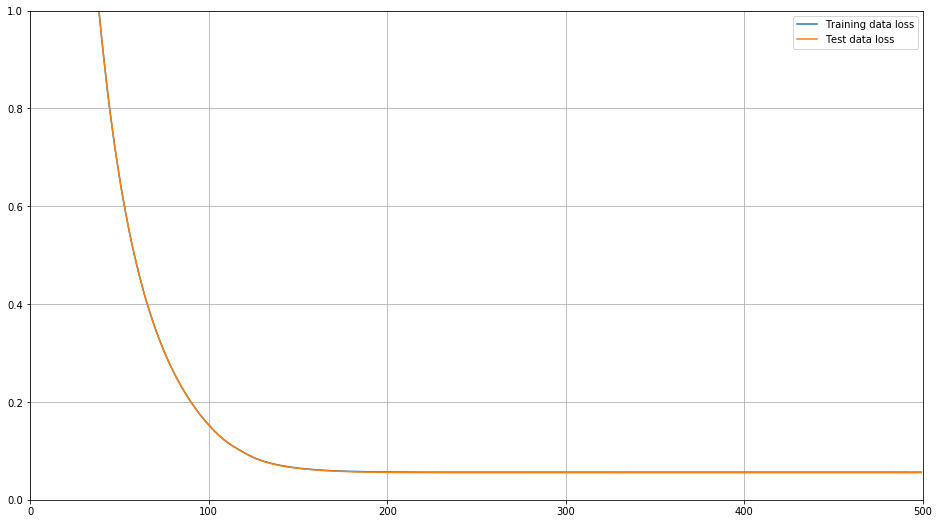

Model with 11 neurons.


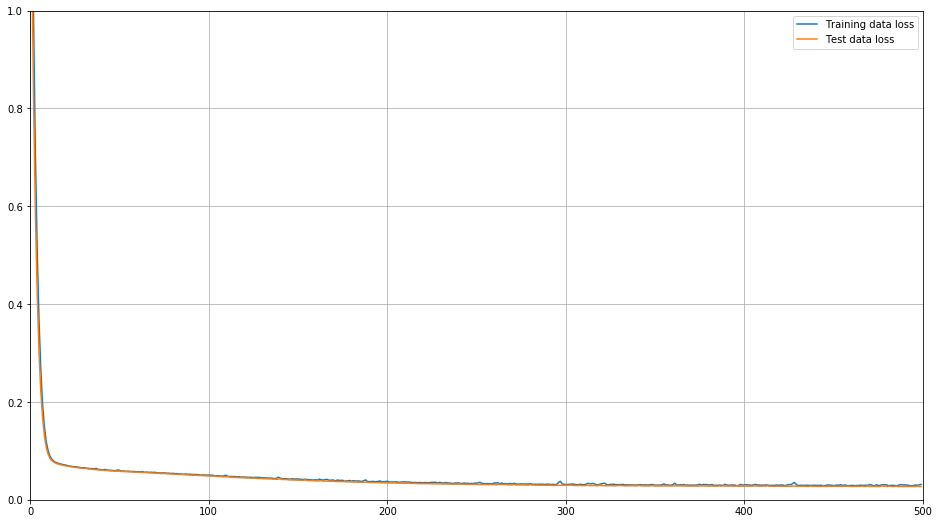

Model with 21 neurons.


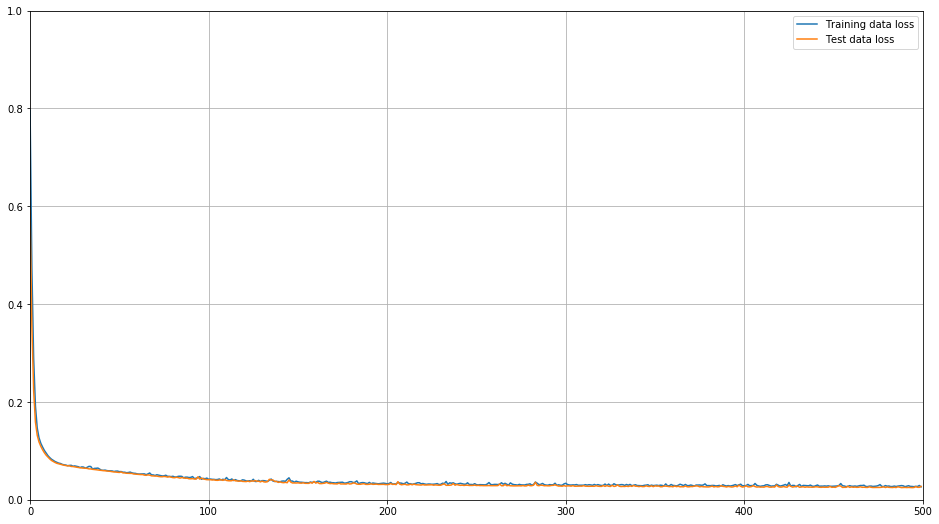

Model with 31 neurons.


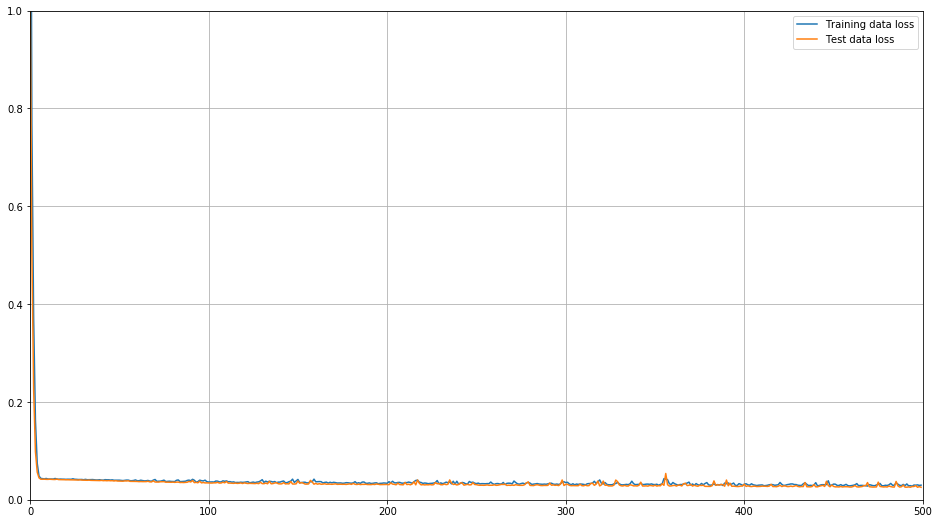

Model with 41 neurons.


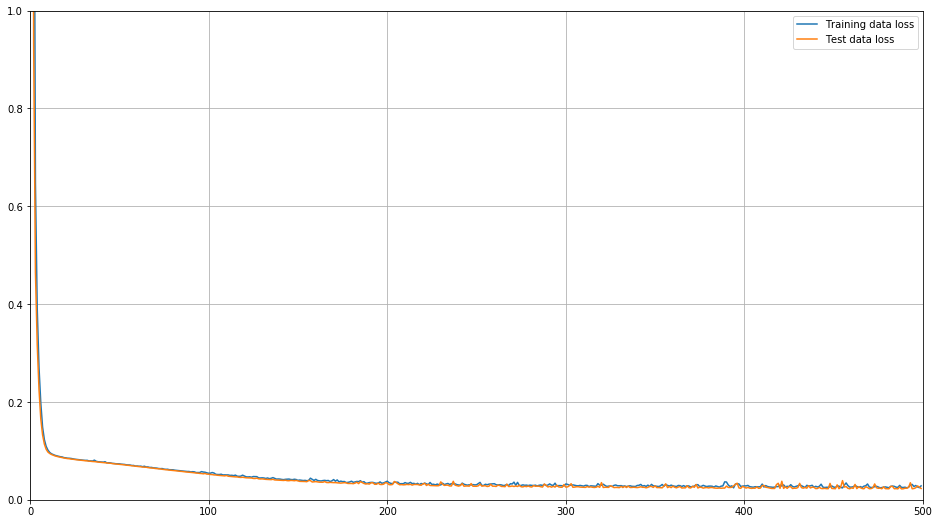

Model with 51 neurons.


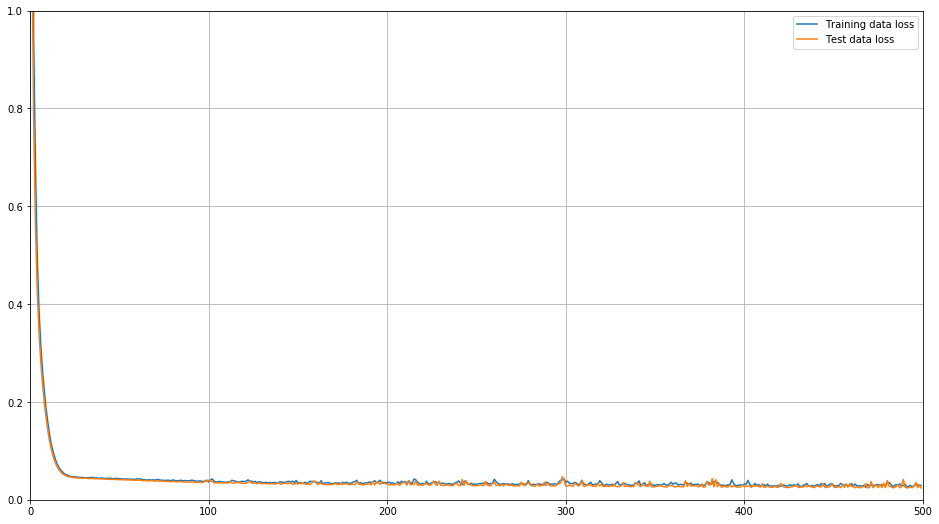

Model with 61 neurons.


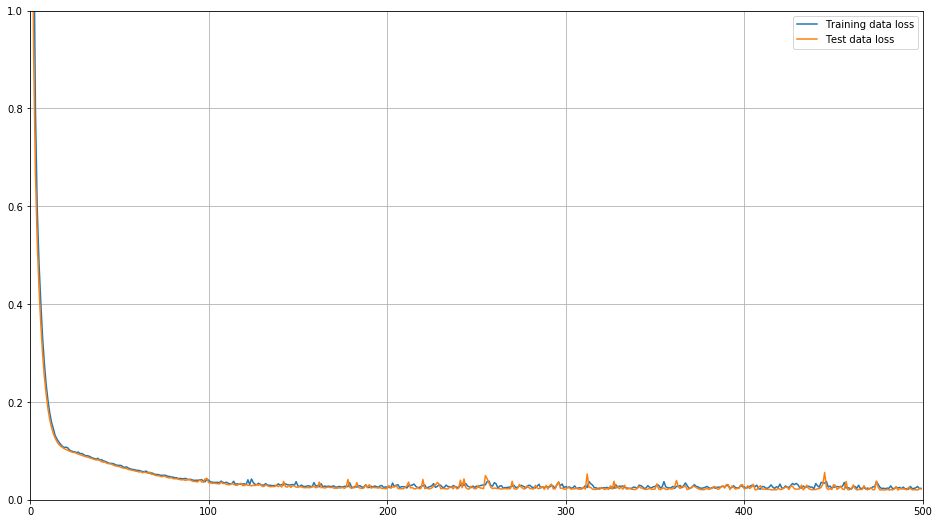

Model with 71 neurons.


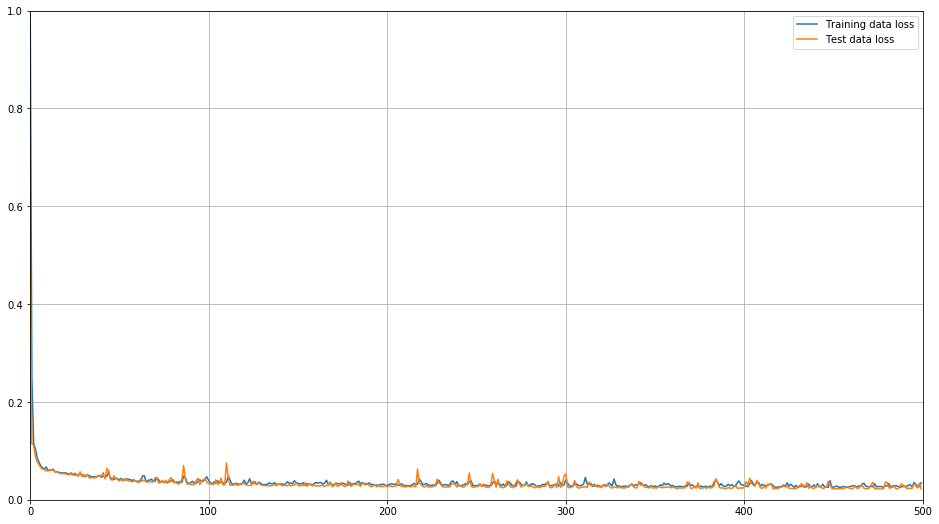

Model with 81 neurons.


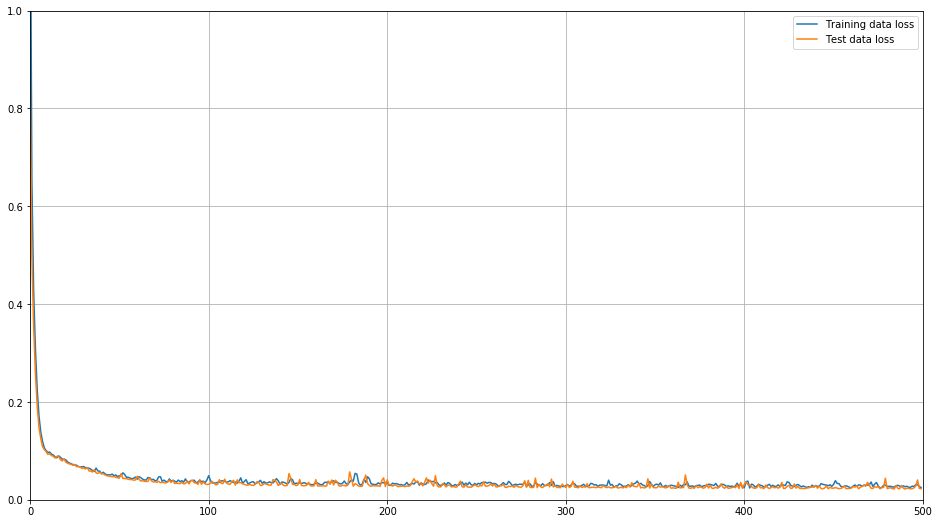

Model with 91 neurons.


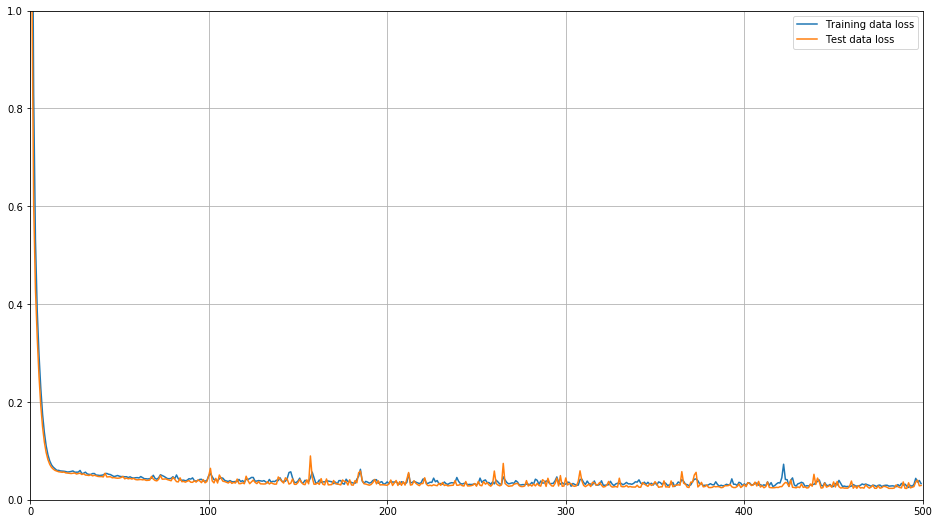

Model with 101 neurons.


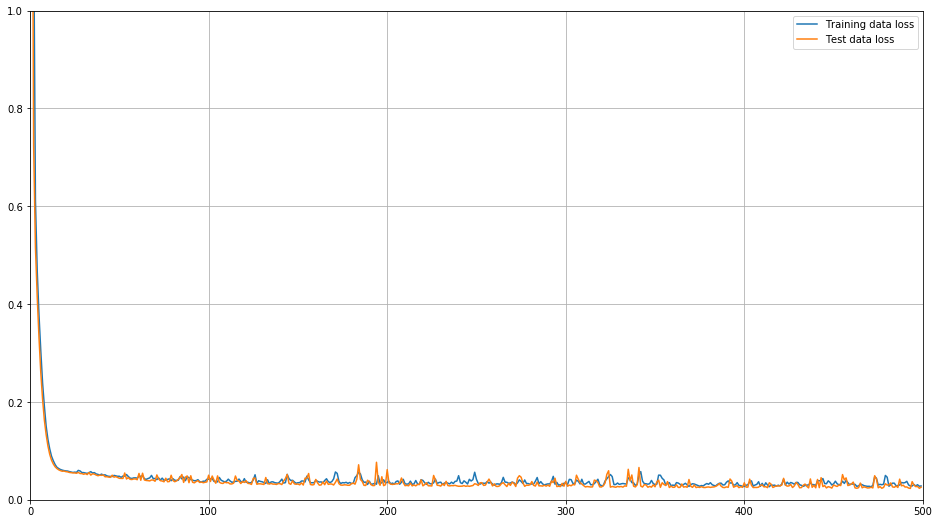

Model with 111 neurons.


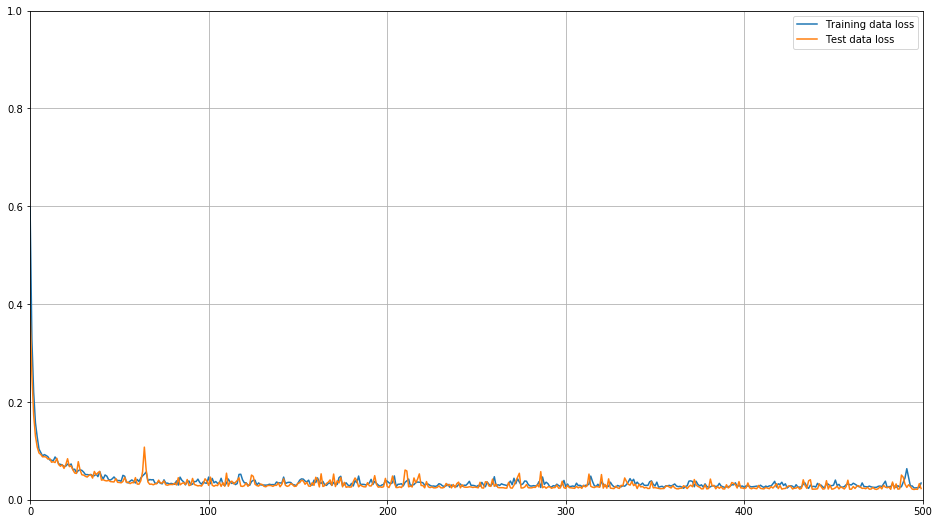

Model with 121 neurons.


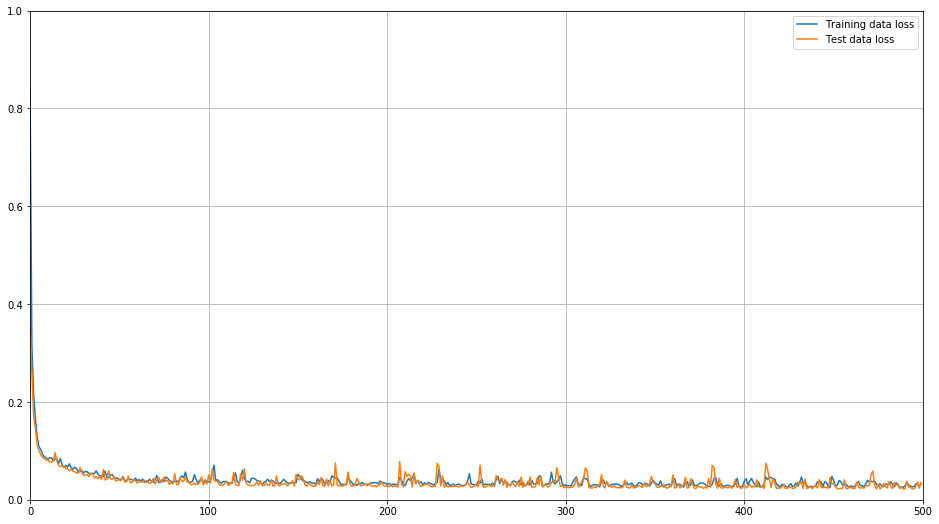

In [263]:
for number, loss in zip(neurons_number, losses):
    print("Model with {0} neurons.".format(number))
    plt.plot(loss['loss'], label='Training data loss')
    plt.plot(loss['val_loss'], label='Test data loss')
    plt.axis([0, 500, 0, 1])
    plt.grid()
    plt.legend()
    plt.show()

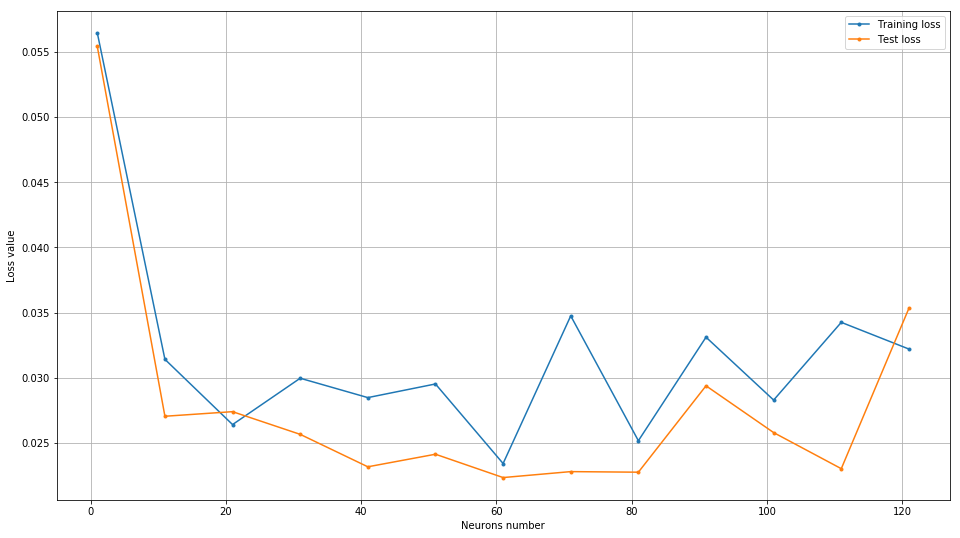

In [268]:
end_loss = []
end_val_loss = []

for loss in losses:
    end_loss.append(loss['loss'][-1])
    end_val_loss.append(loss['val_loss'][-1])

plt.plot(neurons_number, end_loss,'.-', label='Training loss')
plt.plot(neurons_number, end_val_loss,'.-', label='Test loss')
plt.xlabel('Neurons number')
plt.ylabel('Loss value')
plt.grid()
plt.legend()
plt.show()

In [265]:
predictions = {}

for file in os.listdir():
    if file.endswith('.h5'):
        model = load_model(file)
        predictions[file] = model.predict(X)
        

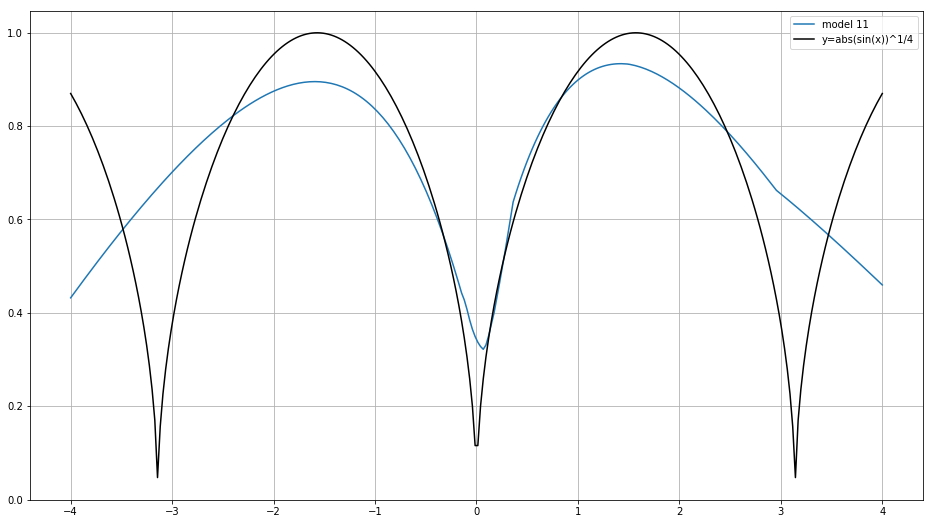

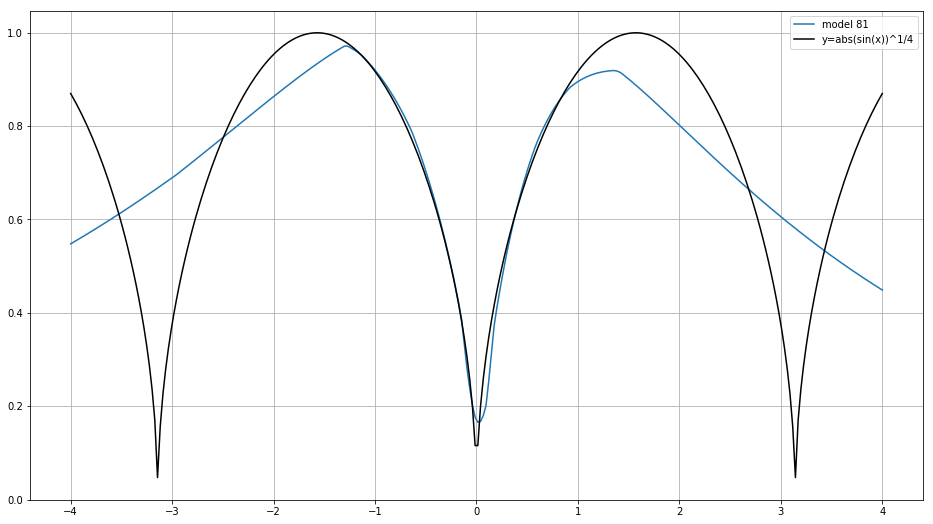

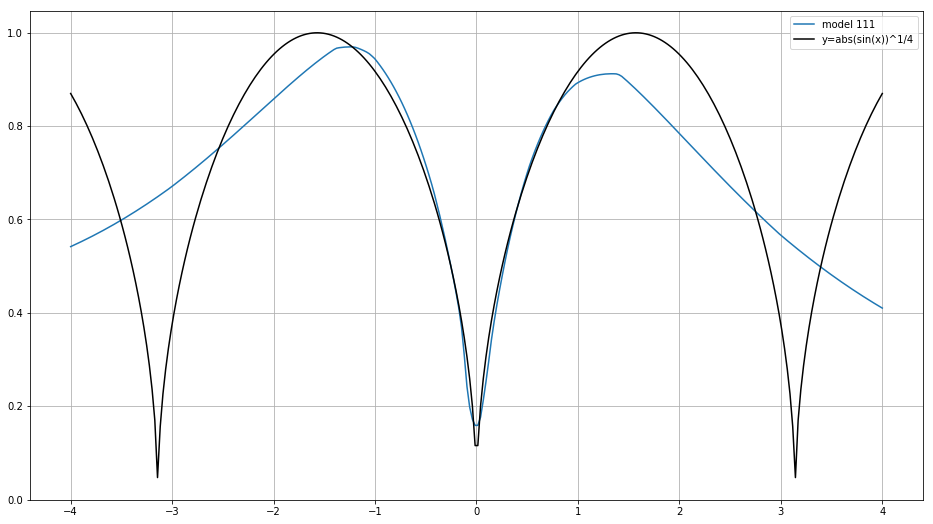

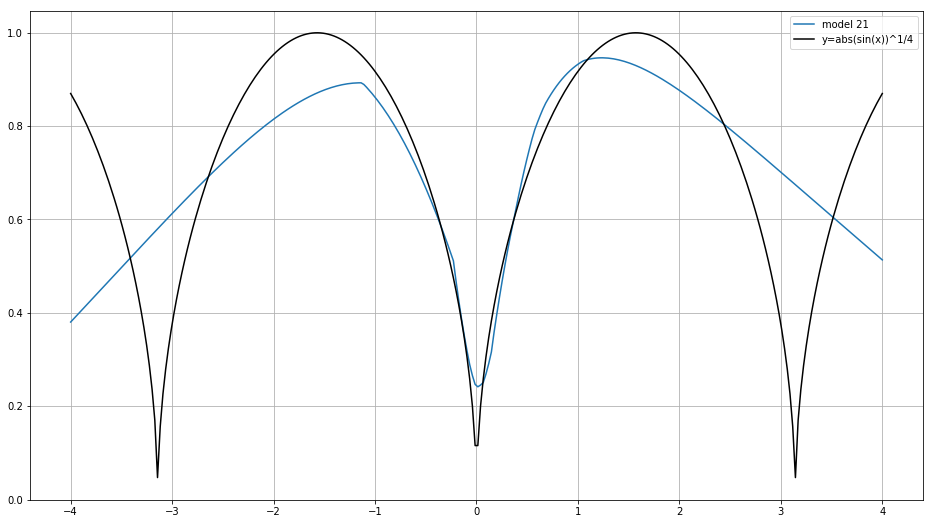

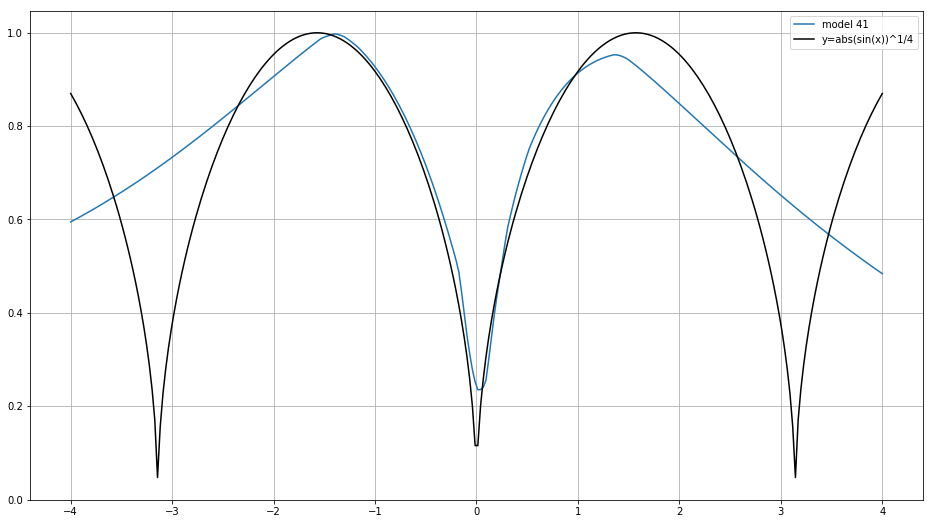

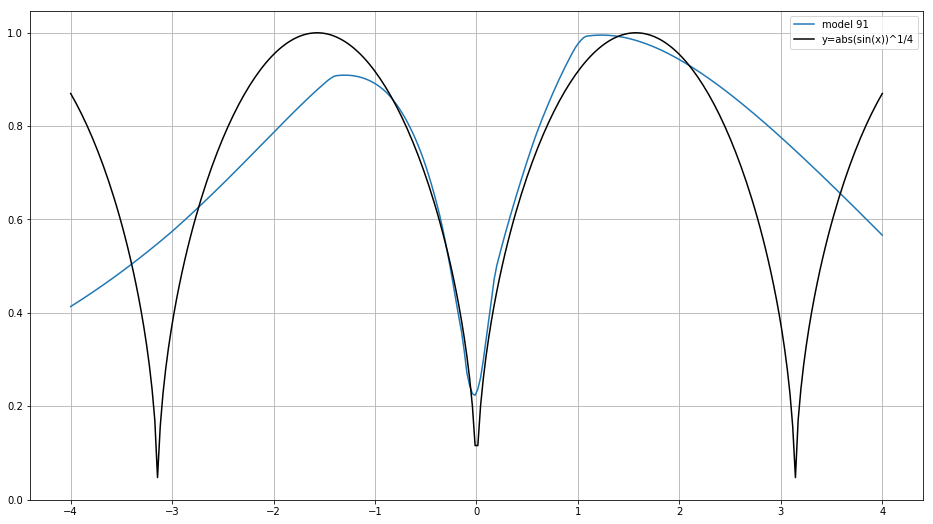

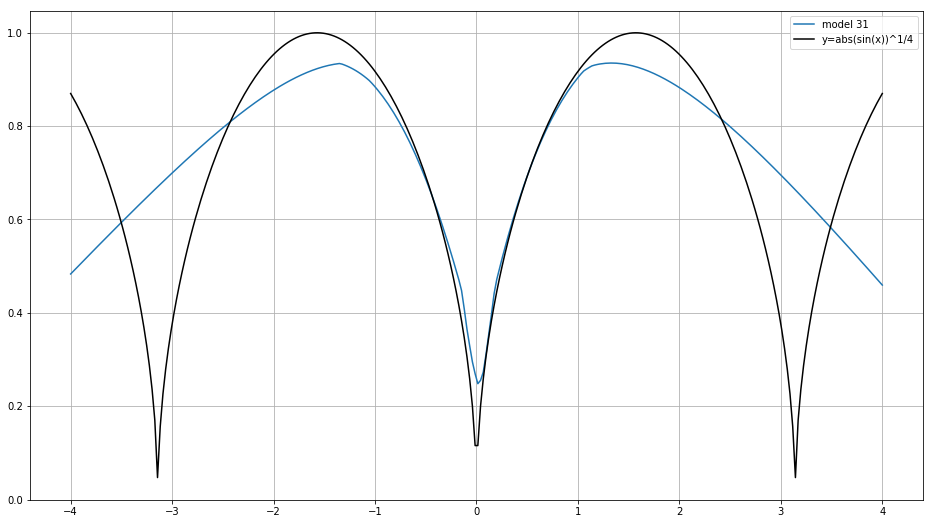

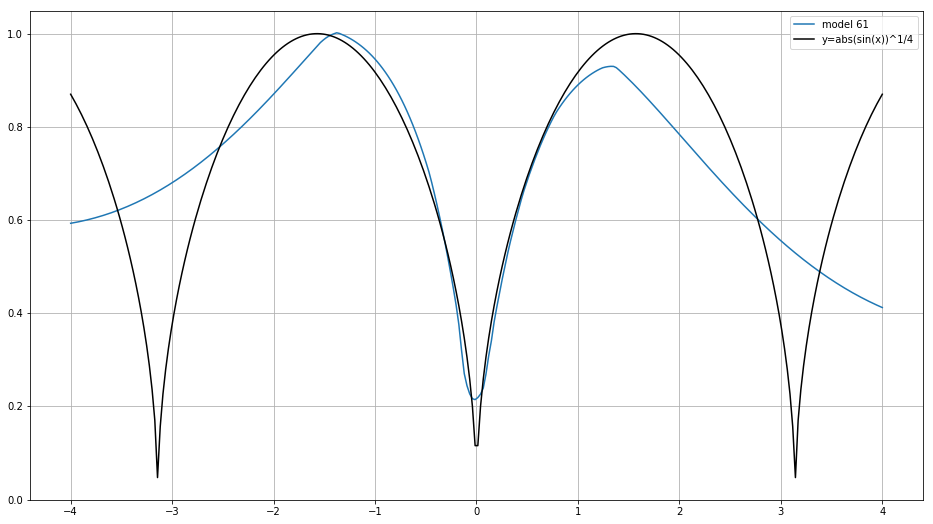

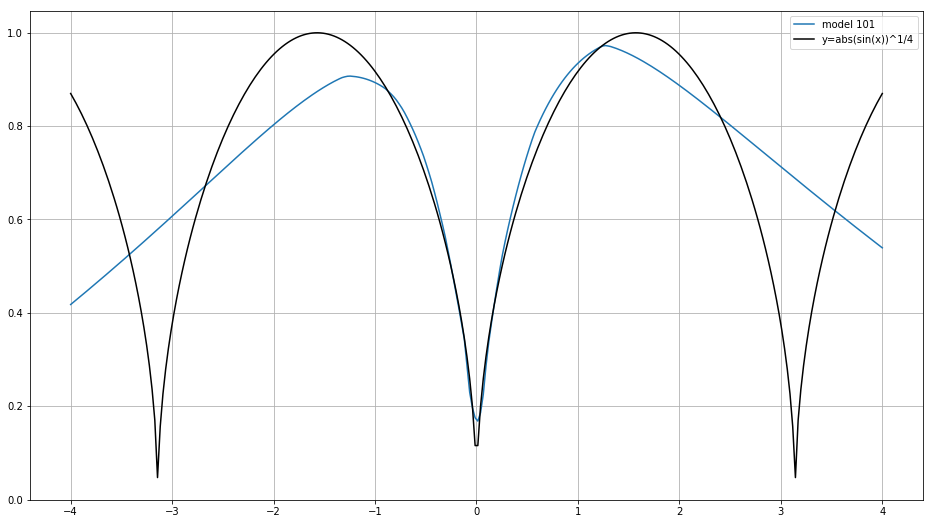

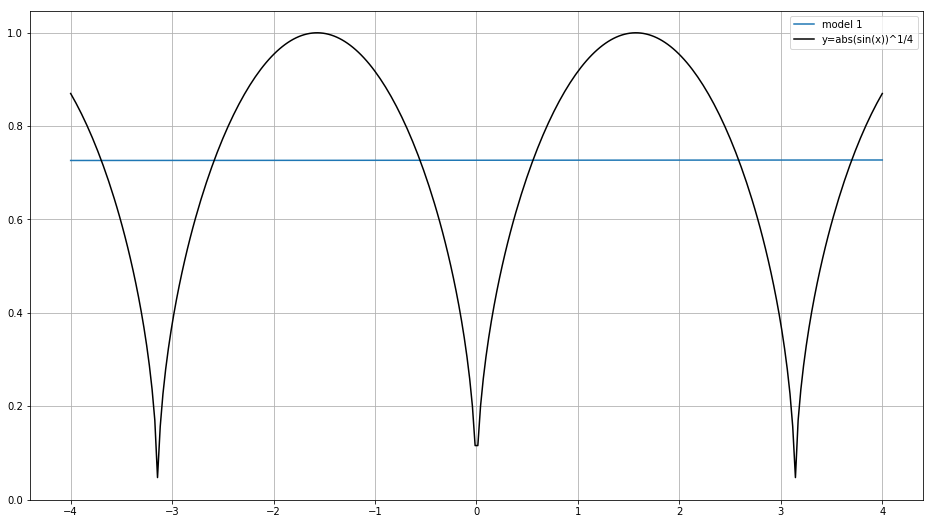

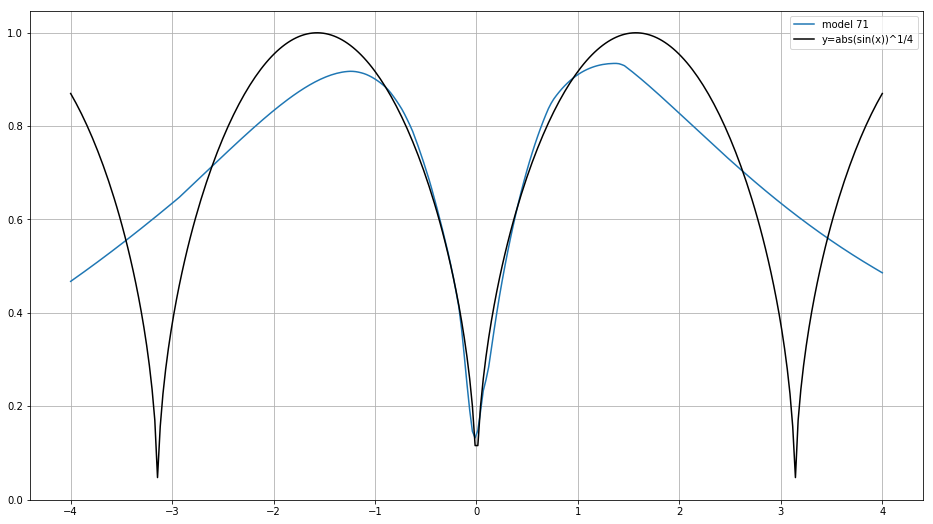

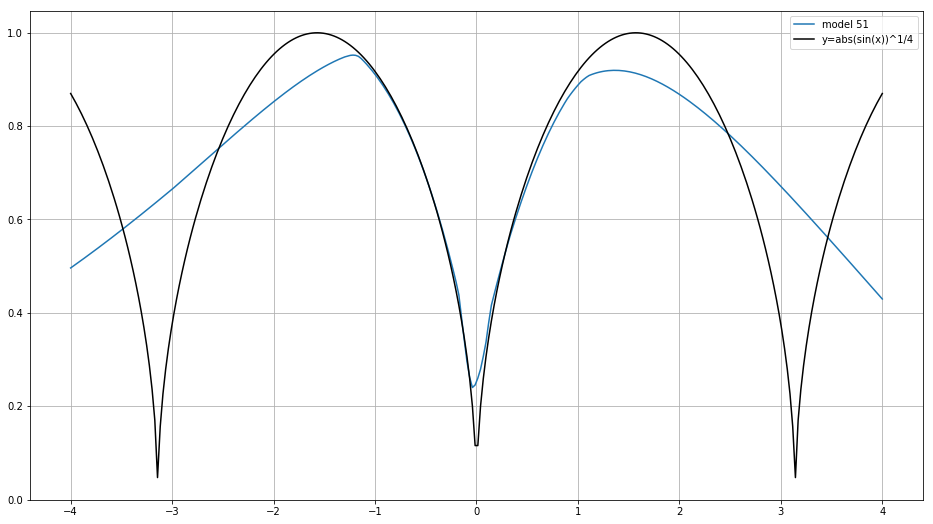

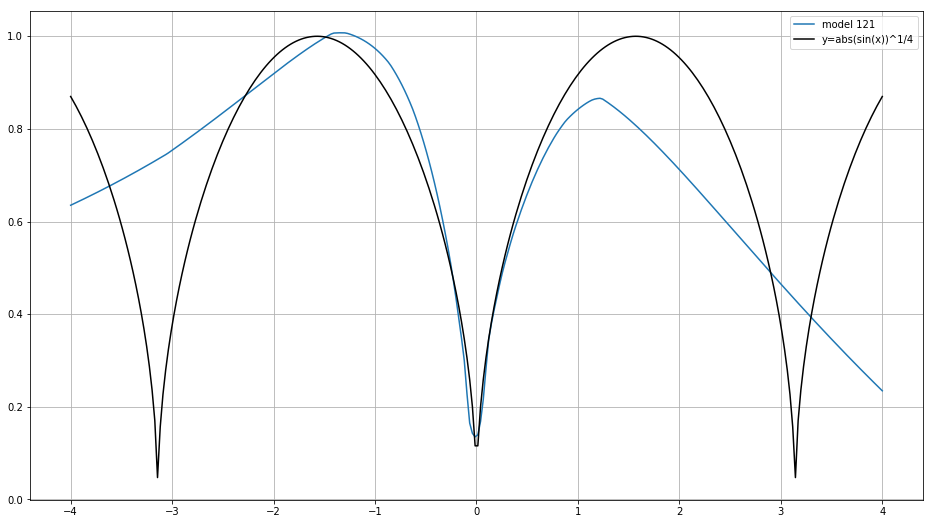

In [267]:
for file in predictions:
    plt.plot(X, predictions[file], label=file[:-3])
    plt.plot(X,y, label='y=abs(sin(x))^1/4', color='#000000')
    plt.grid()
    plt.legend()
    plt.show()

# Conclusion:
We don't need large neurons number, we need middle number beetwen 'no we can't' and 'overfit'.
Model with 1 neuron looks like EE with other browsers.